In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
df = pd.read_csv('Archivo_nuevo.csv', sep=',')

C:\Users\nicod\AppData\Local\Temp\ipykernel_18428\3055366909.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Archivo_nuevo.csv', sep=',')


In [2]:
import seaborn as sns
sns.set(font='sans-serif', context='notebook', palette='viridis')
%config InlineBackend.figure_format='retina'

# esto configura la calidad de la imagen. dependerá de tu resolución. el valor por omisión es 80
plt.rcParams["figure.dpi"] = 96


In [3]:
df.head()

,NOM_RBD,NOM_REG_RBD_A,NOM_COM_RBD,COD_DEPE,RURAL_RBD,MRUN,GEN_ALU,EDAD_ALU,NOM_COM_ALU,PROM_GRAL,ASISTENCIA
0,LICEO POLITECNICO ARICA,AYP,ARICA,6,0,459781,1,40,ARICA,"6,6",98
1,LICEO POLITECNICO ARICA,AYP,ARICA,6,0,974395,2,55,ARICA,0,0
2,LICEO POLITECNICO ARICA,AYP,ARICA,6,0,1959596,1,45,ARICA,0,0
3,LICEO POLITECNICO ARICA,AYP,ARICA,6,0,2267103,2,21,ARICA,0,0
4,LICEO POLITECNICO ARICA,AYP,ARICA,6,0,2306638,1,18,ARICA,0,0


In [4]:
df['PROM_GRAL'] = df['PROM_GRAL'].str.replace(',', '.') #Reemplazar comas por puntos
df['PROM_GRAL'] = df['PROM_GRAL'].replace('0', np.nan) #Reemplazar ceros por NaN
df['PROM_GRAL'] = df['PROM_GRAL'].astype(float) #Transformar la columna a float

In [5]:
df = df.dropna() #Eliminar las filas que contengan un valor NaN

In [6]:
df.tail()

,NOM_RBD,NOM_REG_RBD_A,NOM_COM_RBD,COD_DEPE,RURAL_RBD,MRUN,GEN_ALU,EDAD_ALU,NOM_COM_ALU,PROM_GRAL,ASISTENCIA
3400755,ESCUELA HOSPITALARIA SANTA CRUZ,LGBO,SANTA CRUZ,3,0,21859315,1,16,LOLOL,6.0,85
3400757,ESCUELA HOSPITALARIA SANTA CRUZ,LGBO,SANTA CRUZ,3,0,5717717,1,21,DOÑIHUE,6.6,90
3400760,ESCUELA HOSPITALARIA SANTA CRUZ,LGBO,SANTA CRUZ,3,0,13023637,2,17,SANTA CRUZ,6.9,90
3400764,ESCUELA HOSPITALARIA SANTA CRUZ,LGBO,SANTA CRUZ,3,0,25734022,2,18,SANTA CRUZ,6.4,90
3400766,ESCUELA HOSPITALARIA PROVINCIA CORDILLERA PUEN...,RM,PUENTE ALTO,3,0,25297404,1,6,PUENTE ALTO,6.5,100


In [7]:
# Calcular el promedio para establecimientos urbanos en Chile
promedio_urbano = df[df['RURAL_RBD'] == 0]['PROM_GRAL'].mean()

# Calcular el promedio para establecimientos no urbanos en Chile
promedio_no_urbano = df[df['RURAL_RBD'] == 1]['PROM_GRAL'].mean()

print('Promedio Urbano en Chile:', promedio_urbano)
print('Promedio No Urbano en Chile:', promedio_no_urbano)

Promedio Urbano en Chile: 6.010974074997458
Promedio No Urbano en Chile: 6.083199755152011


In [8]:
# Calcular el número de establecimientos urbanos en Chile
cuenta_urbano = df[df['RURAL_RBD'] == 0].count()

# Calcular el número de establecimientos no urbanos en Chile
cuenta_no_urbano = df[df['RURAL_RBD'] == 1].count()

print('Urbano: ', cuenta_urbano)
print('No Urbano: ',  cuenta_no_urbano)

Urbano:  NOM_RBD          2847830
NOM_REG_RBD_A    2847830
NOM_COM_RBD      2847830
COD_DEPE         2847830
RURAL_RBD        2847830
MRUN             2847830
GEN_ALU          2847830
EDAD_ALU         2847830
NOM_COM_ALU      2847830
PROM_GRAL        2847830
ASISTENCIA       2847830
dtype: int64
No Urbano:  NOM_RBD          245050
NOM_REG_RBD_A    245050
NOM_COM_RBD      245050
COD_DEPE         245050
RURAL_RBD        245050
MRUN             245050
GEN_ALU          245050
EDAD_ALU         245050
NOM_COM_ALU      245050
PROM_GRAL        245050
ASISTENCIA       245050
dtype: int64


C:\Users\nicod\anaconda3\envs\vizudd\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nicod\anaconda3\envs\vizudd\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


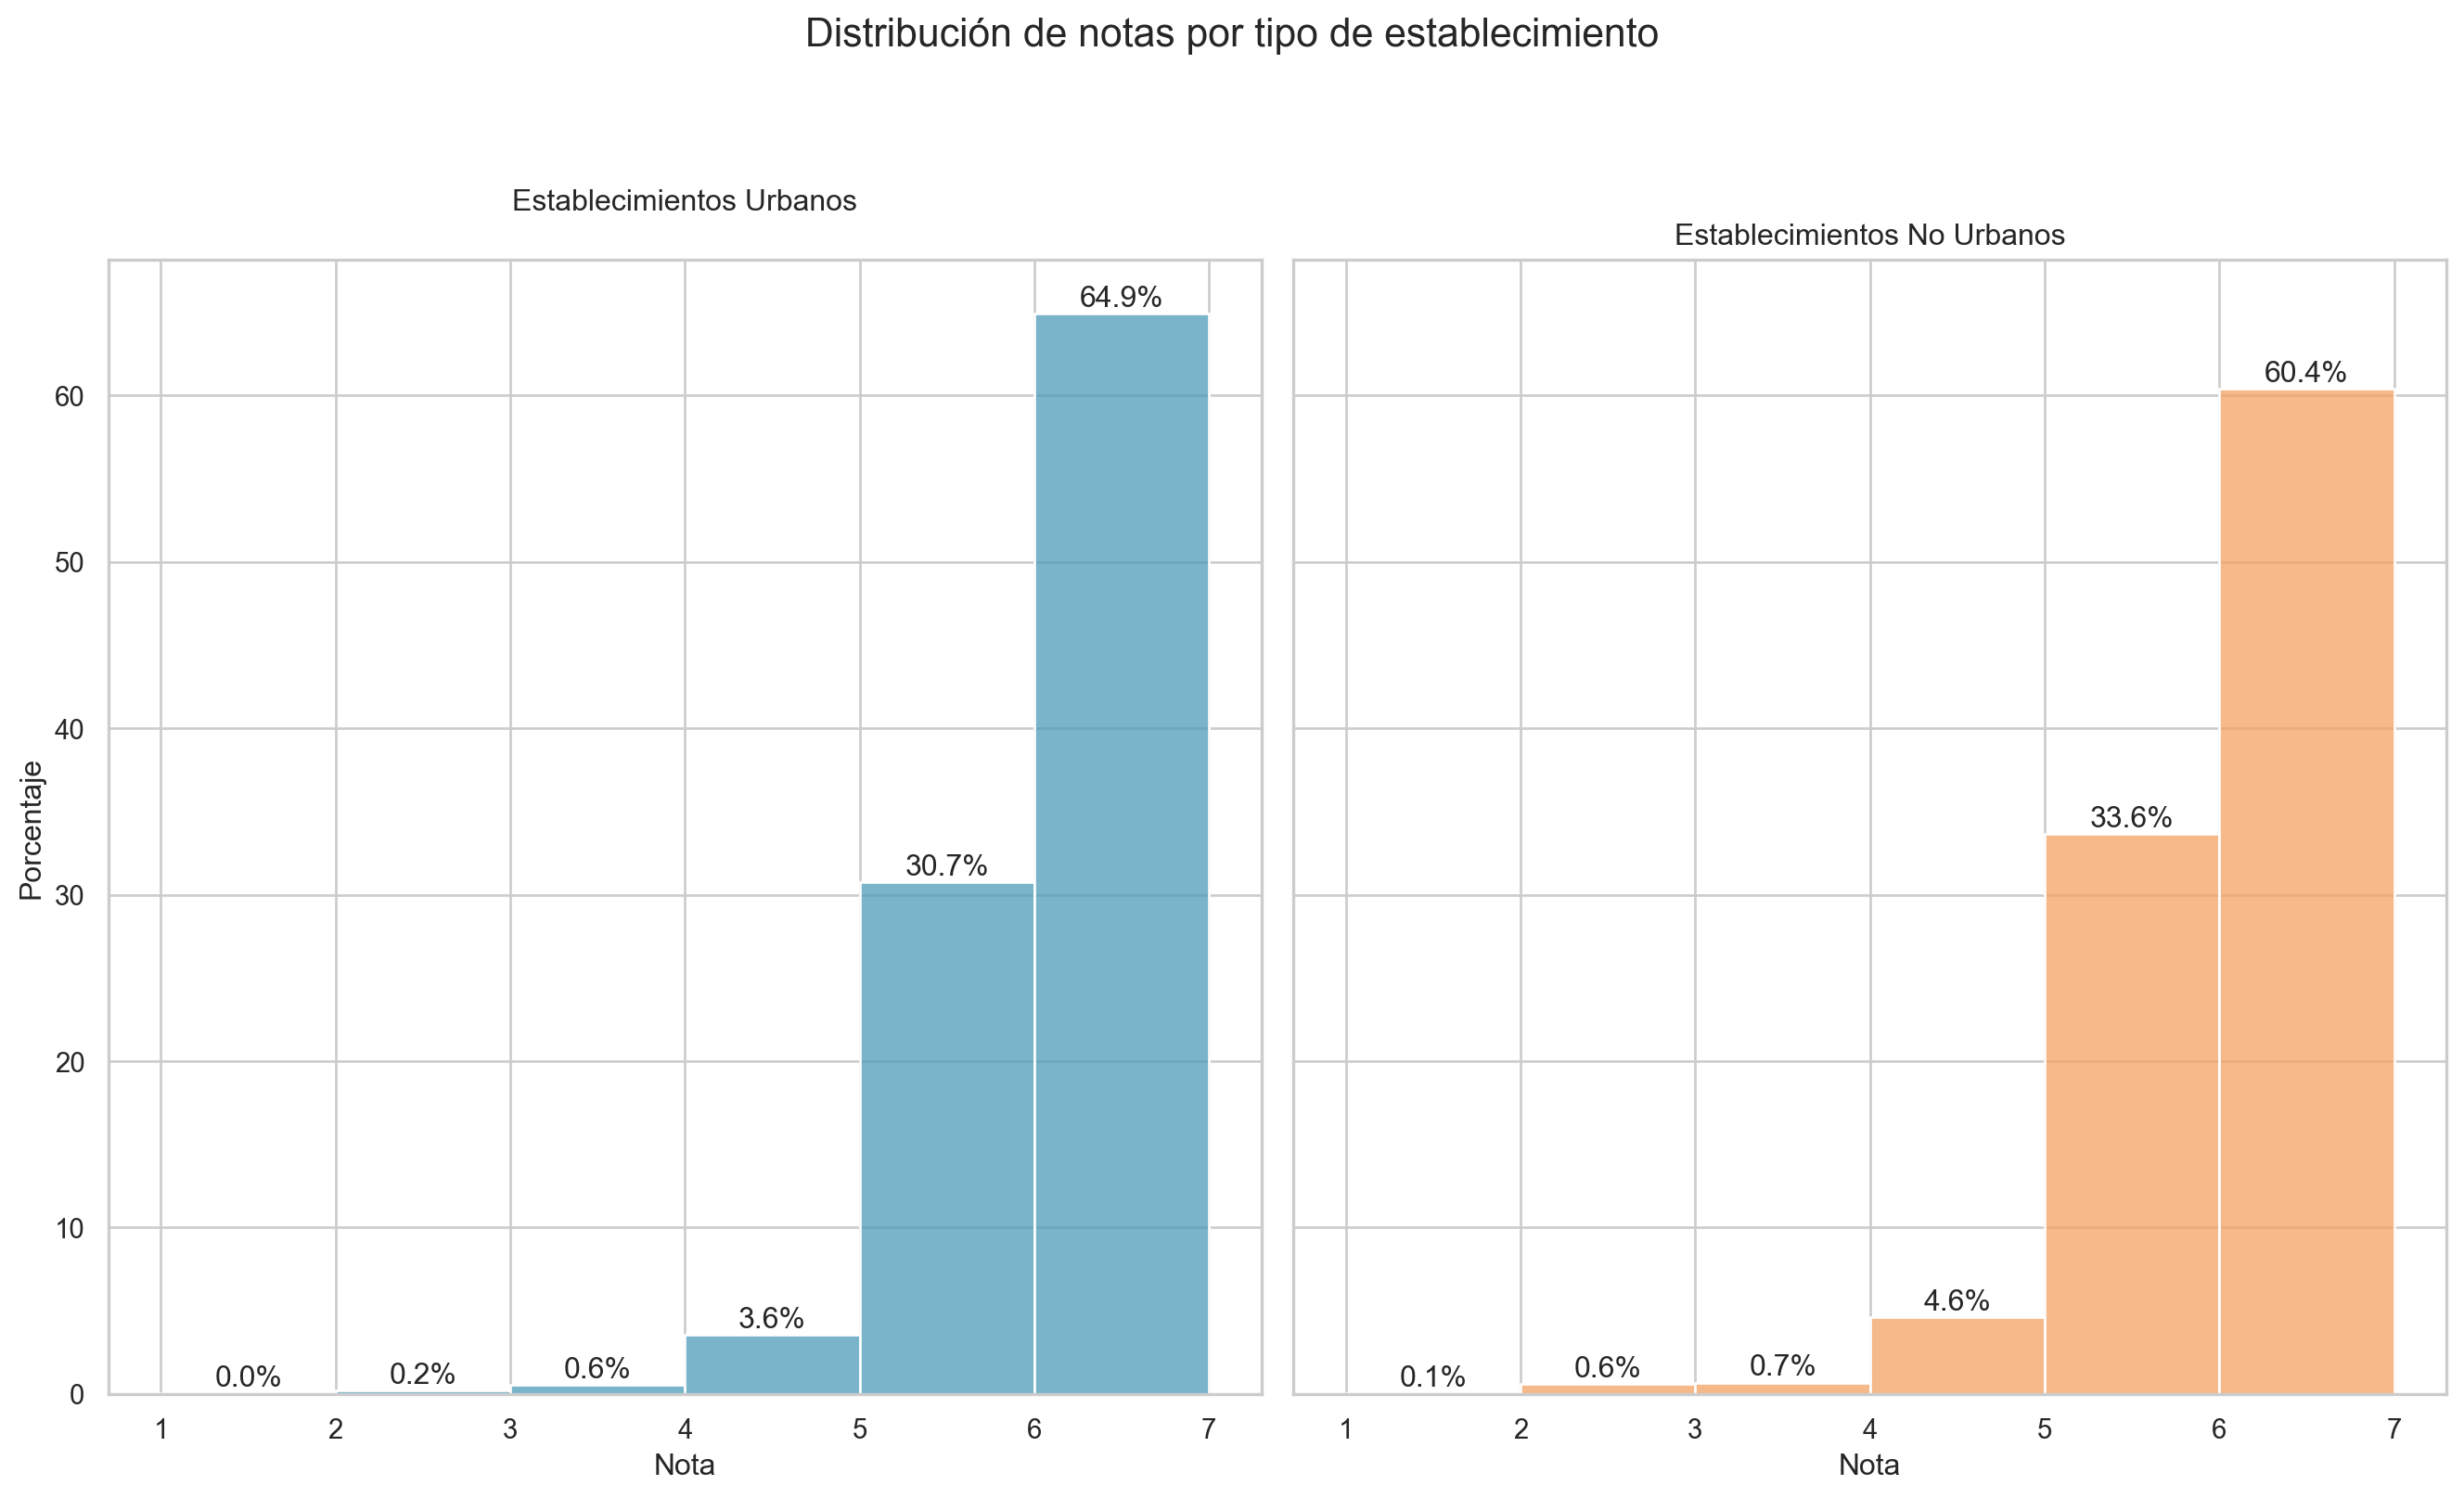

In [23]:
bins = [1,2,3,4,5,6,7]

# Separar los datos en dos dataframes: uno para urbano y otro para no urbano
df_urbano = df[df['RURAL_RBD'] == '1']
df_no_urbano = df[df['RURAL_RBD'] == '0']

# Crear figuras y subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

# Colores para las barras
color_urbano = '#4C9BBA'
color_no_urbano = '#F4A261'

# Histograma para establecimientos urbanos
sns.histplot(df_urbano['PROM_GRAL'], bins=bins, kde=False, ax=ax1, color=color_urbano, stat='percent')
ax1.set_title('Establecimientos Urbanos', pad=20)
ax1.set_xlabel('Nota')
ax1.set_ylabel('Porcentaje')

# Añadir los números dentro de las barras
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.1f}%'.format(height), ha="center", va="bottom")

# Histograma para establecimientos no urbanos
sns.histplot(df_no_urbano['PROM_GRAL'], bins=bins, kde=False, ax=ax2, color=color_no_urbano, stat='percent')
ax2.set_title('Establecimientos No Urbanos', pad=20)
ax2.set_xlabel('Nota')
ax2.set_ylabel('')

# Añadir los números dentro de las barras
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 0.1, '{:.1f}%'.format(height), ha="center", va="bottom")

# Título general
fig.suptitle('Distribución de notas por tipo de establecimiento', fontsize=16, y=1.05)

# Ajustar los márgenes para que los subplots no se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

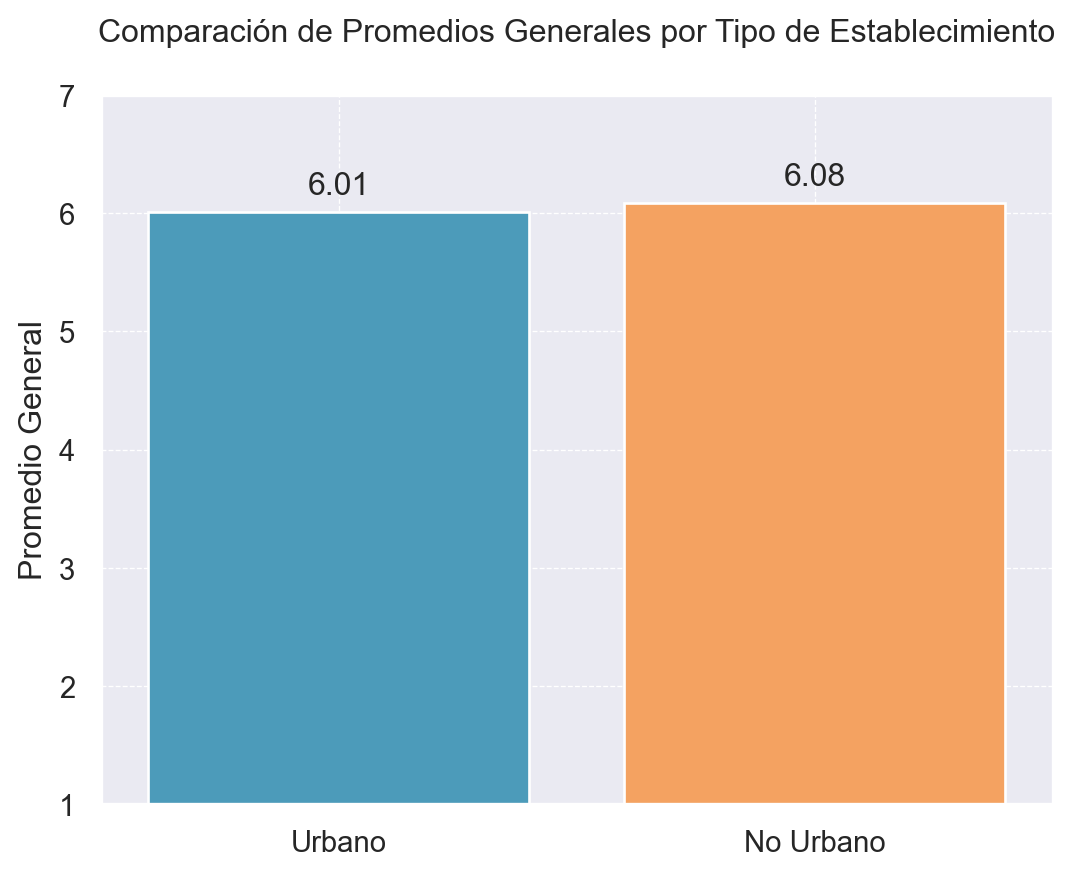

In [10]:
fig, ax = plt.subplots()

# Nombres de las categoríasimport pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
df = pd.read_csv('Archivo_nuevo.csv', sep=',')
labels = ['Urbano', 'No Urbano']
values = [promedio_urbano, promedio_no_urbano]
bars = ax.bar(labels, values, color=['#4C9BBA', '#F4A261'], width=0.8, edgecolor='white', linewidth=1)

ax.set_ylabel('Promedio General')
ax.set_title('Comparación de Promedios Generales por Tipo de Establecimiento', pad=20)
ax.set_ylim([1, 7])  # Ajusta esto según el rango de tus promedios

# Ajustar los límites del eje X para centrar las barras
ax.set_xlim(-0.5, len(labels)-0.5)  # Ajustar para centrar las barras

# Añadir el número dentro de las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')
    
# Mejorar el estilo del gráfico
sns.set_style("whitegrid")
ax.grid(True, linestyle='--', linewidth=0.5)

#Mostrar el gráfico
plt.show()

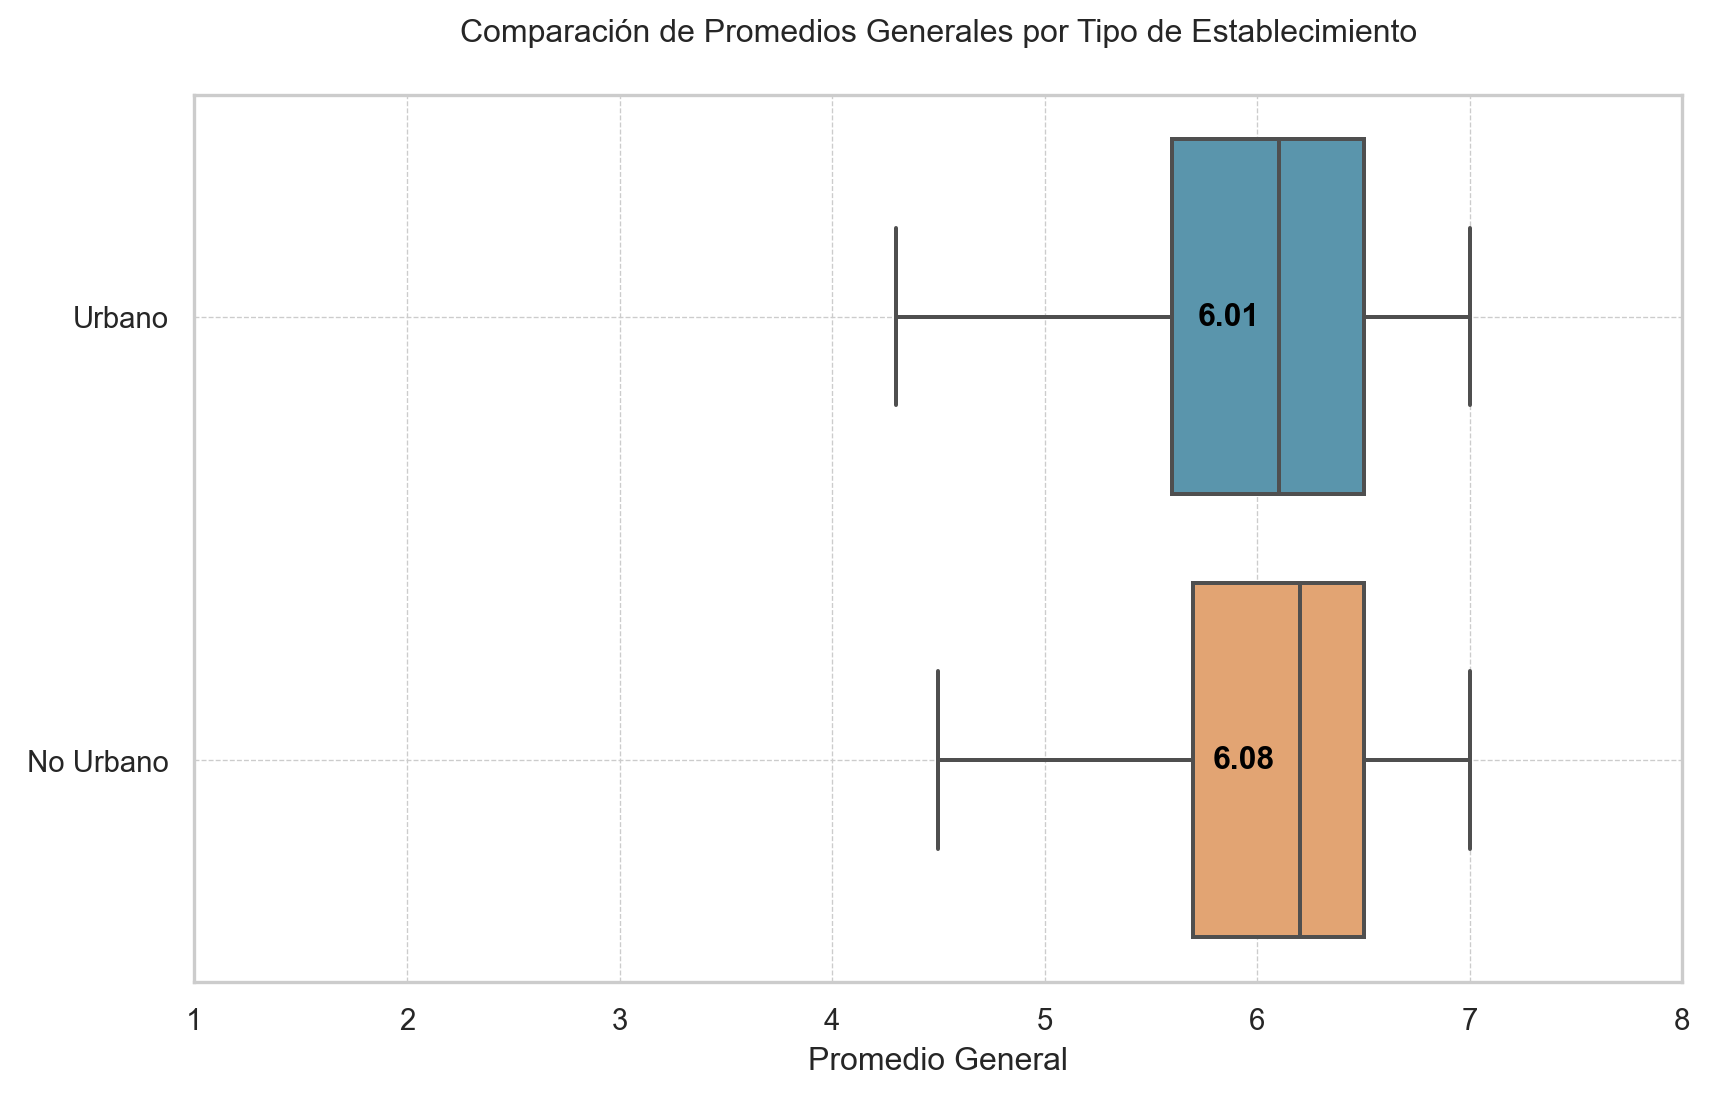

In [24]:
# Renombrar las categorías para mayor claridad
df['RURAL_RBD'] = df['RURAL_RBD'].replace({'0': 'Urbano', '1': ' No Urbano'})

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el boxplot con ejes intercambiados
sns.boxplot(y='RURAL_RBD', x='PROM_GRAL', data=df, ax=ax, palette=['#4C9BBA', '#F4A261'], showfliers=False)

# Añadir etiquetas y título
ax.set_ylabel('')
ax.set_xlabel('Promedio General')
ax.set_title('Comparación de Promedios Generales por Tipo de Establecimiento', pad=20)
ax.set_xlim([1, 8])  # Ajusta esto según el rango de tus promedios

# Añadir los valores promedios en la posición correspondiente
ax.text(promedio_urbano, 0, f'{promedio_urbano:.2f}', ha='right', va='center', color='black', fontweight='bold')
ax.text(promedio_no_urbano, 1, f'{promedio_no_urbano:.2f}', ha='right', va='center', color='black', fontweight='bold')

# Mejorar el estilo del gráfico
sns.set_style("whitegrid")
ax.grid(True, linestyle='--', linewidth=0.5)

# Mostrar el gráfico
plt.show()

RURAL_RBD            0      1
NOM_REG_RBD_A                
ANTOF           113998    602
ARAUC           152637  29972
ATCMA            55725   1617
AYP              42073   3348
AYSEN            17142   3153
BBIO            247620  22515
COQ             137303  13441
LAGOS           131628  27353
LGBO            141175  28178
MAG              27169    247
MAULE           159290  34540
NUBLE            71205  12761
RIOS             54666  15531
RM             1133294  29308
TPCA             59007  11178
VALPO           303898  11306


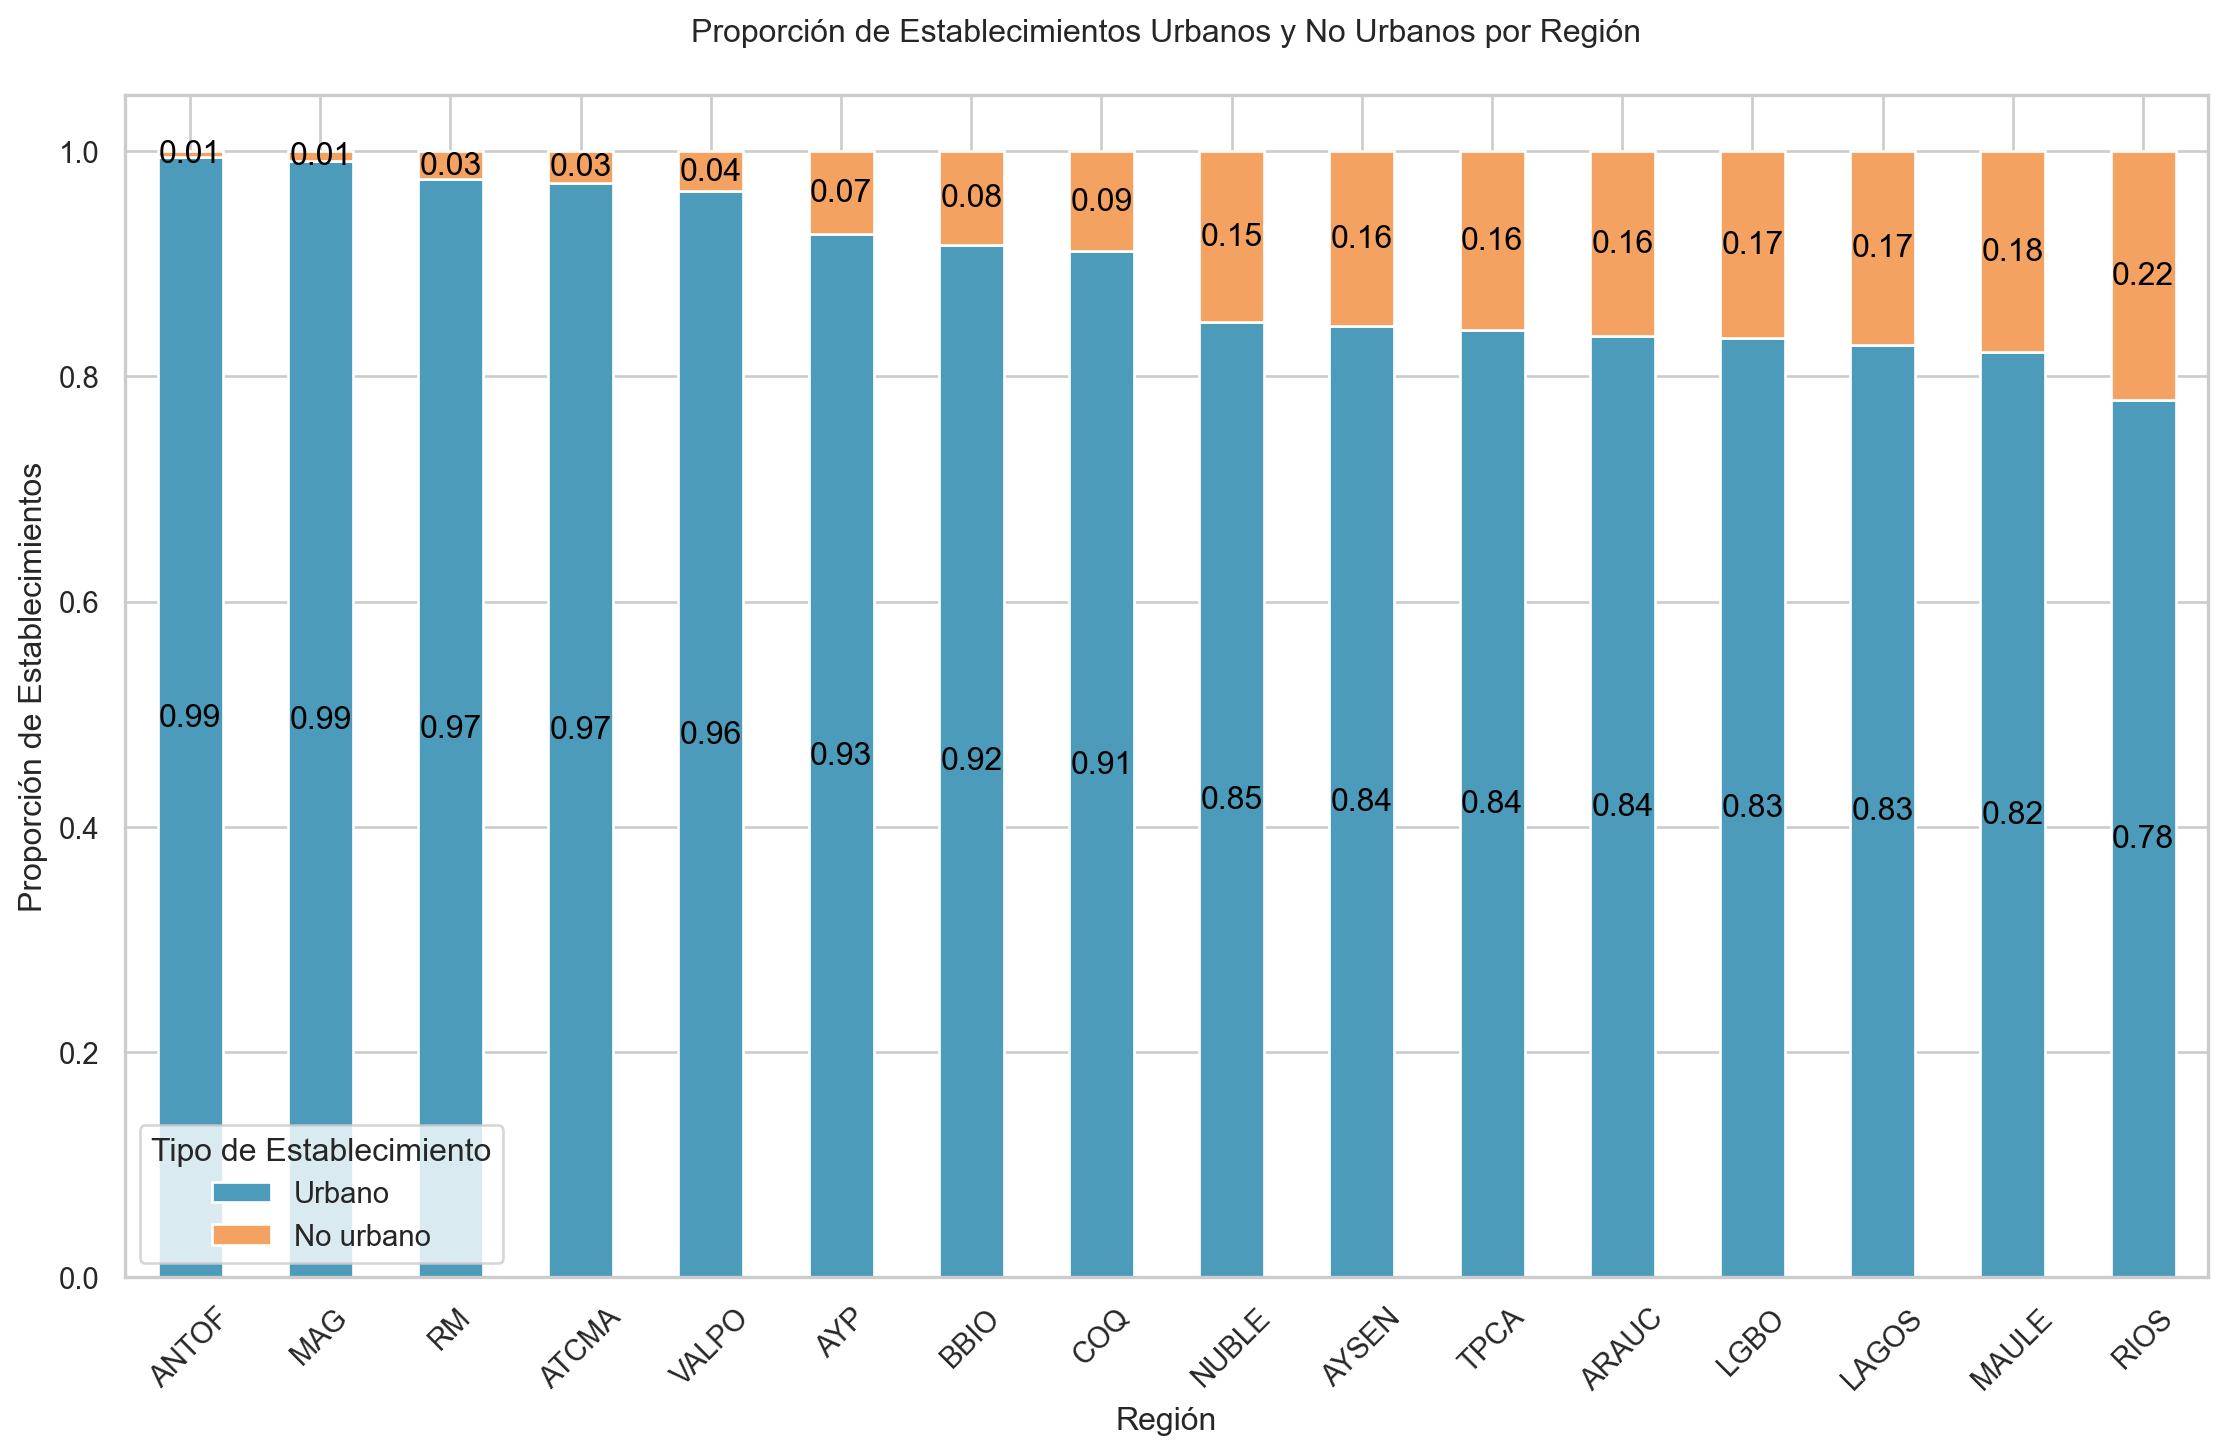

In [12]:
df['RURAL_RBD'] = df['RURAL_RBD'].astype(str)

# Crear una tabla pivotada para contar la cantidad de establecimientos por región y tipo
pivot_table = df.pivot_table(index='NOM_REG_RBD_A', columns='RURAL_RBD', aggfunc='size', fill_value=0)

print(pivot_table)

# Normalizar los datos para que cada región sume 1 (proporción)
pivot_table_normalized = pivot_table.div(pivot_table.sum(axis=1), axis=0)

pivot_table_normalized = pivot_table_normalized.sort_values(by='0', ascending=False)

colors = ['#4C9BBA', '#F4A261']

# Crear el gráfico de barras apiladas normalizadas
ax = pivot_table_normalized.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)
ax.legend(['Urbano', 'No urbano'], title='Tipo de Establecimiento', loc='lower left')

# Añadir etiquetas y título
plt.xlabel('Región')
plt.ylabel('Proporción de Establecimientos')
plt.title('Proporción de Establecimientos Urbanos y No Urbanos por Región', pad=20)

# Añadir los números dentro de cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.2f}', ha='center', va='center', color='black')
    
# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

C:\Users\nicod\AppData\Local\Temp\ipykernel_18428\2417140409.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='ASISTENCIA_BIN', columns='PROM_GRAL_BIN', aggfunc='size', fill_value=0)


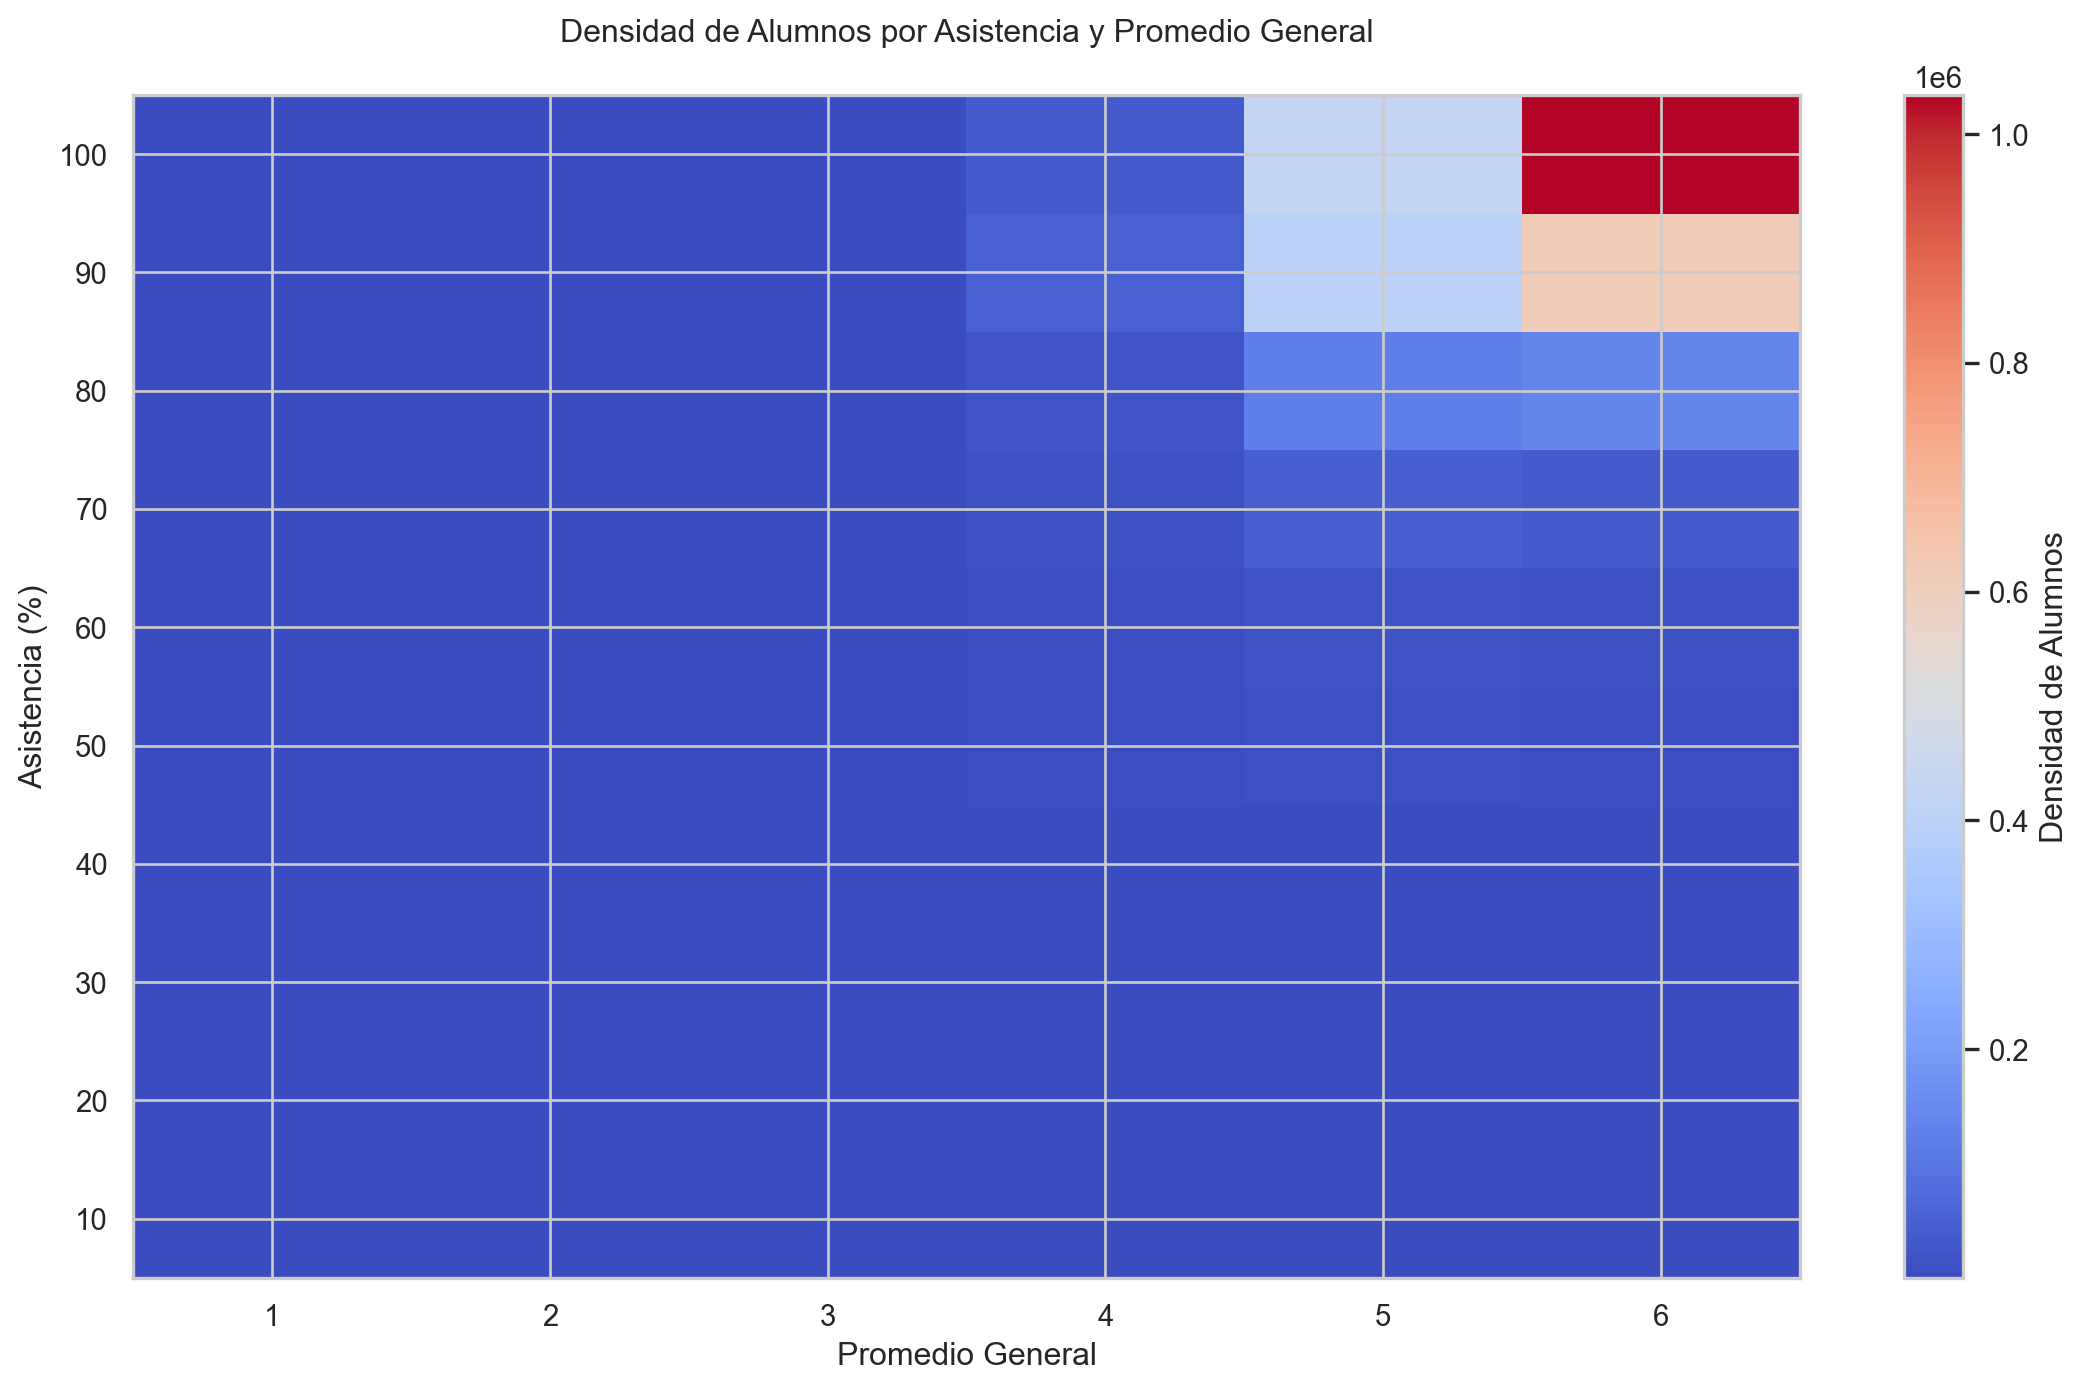

In [63]:
# Asegurar que los datos estén en los rangos correctos y sean categorizados si es necesario
bins_nota = [1, 2, 3, 4, 5, 6, 7]
labels_nota = [1, 2, 3, 4, 5, 6]

bins_asistencia = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels_asistencia = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

df['ASISTENCIA_BIN'] = pd.cut(df['ASISTENCIA'], bins=bins_asistencia, labels=labels_asistencia)
df['PROM_GRAL_BIN'] = pd.cut(df['PROM_GRAL'], bins=bins_nota, right=False, labels=labels_nota)

# Crear una tabla pivotada para contar la cantidad de estudiantes por categoría
pivot_table = df.pivot_table(index='ASISTENCIA_BIN', columns='PROM_GRAL_BIN', aggfunc='size', fill_value=0)

# Generar el heatmap
plt.figure(figsize=(14, 8))
heatmap = plt.imshow(pivot_table, aspect='auto', cmap='coolwarm', origin='lower')

# Añadir barra de color
plt.colorbar(heatmap, label='Densidad de Alumnos')

# Añadir etiquetas a los ejes
plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(np.arange(len(pivot_table.index)), pivot_table.index)

# Títulos y etiquetas
plt.xlabel('Promedio General')
plt.ylabel('Asistencia (%)')
plt.title('Densidad de Alumnos por Asistencia y Promedio General', pad=20)

# Mostrar el gráfico
plt.show()

C:\Users\nicod\AppData\Local\Temp\ipykernel_18428\224654817.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='ASISTENCIA_BIN', columns='PROM_GRAL_BIN', aggfunc='size', fill_value=0)


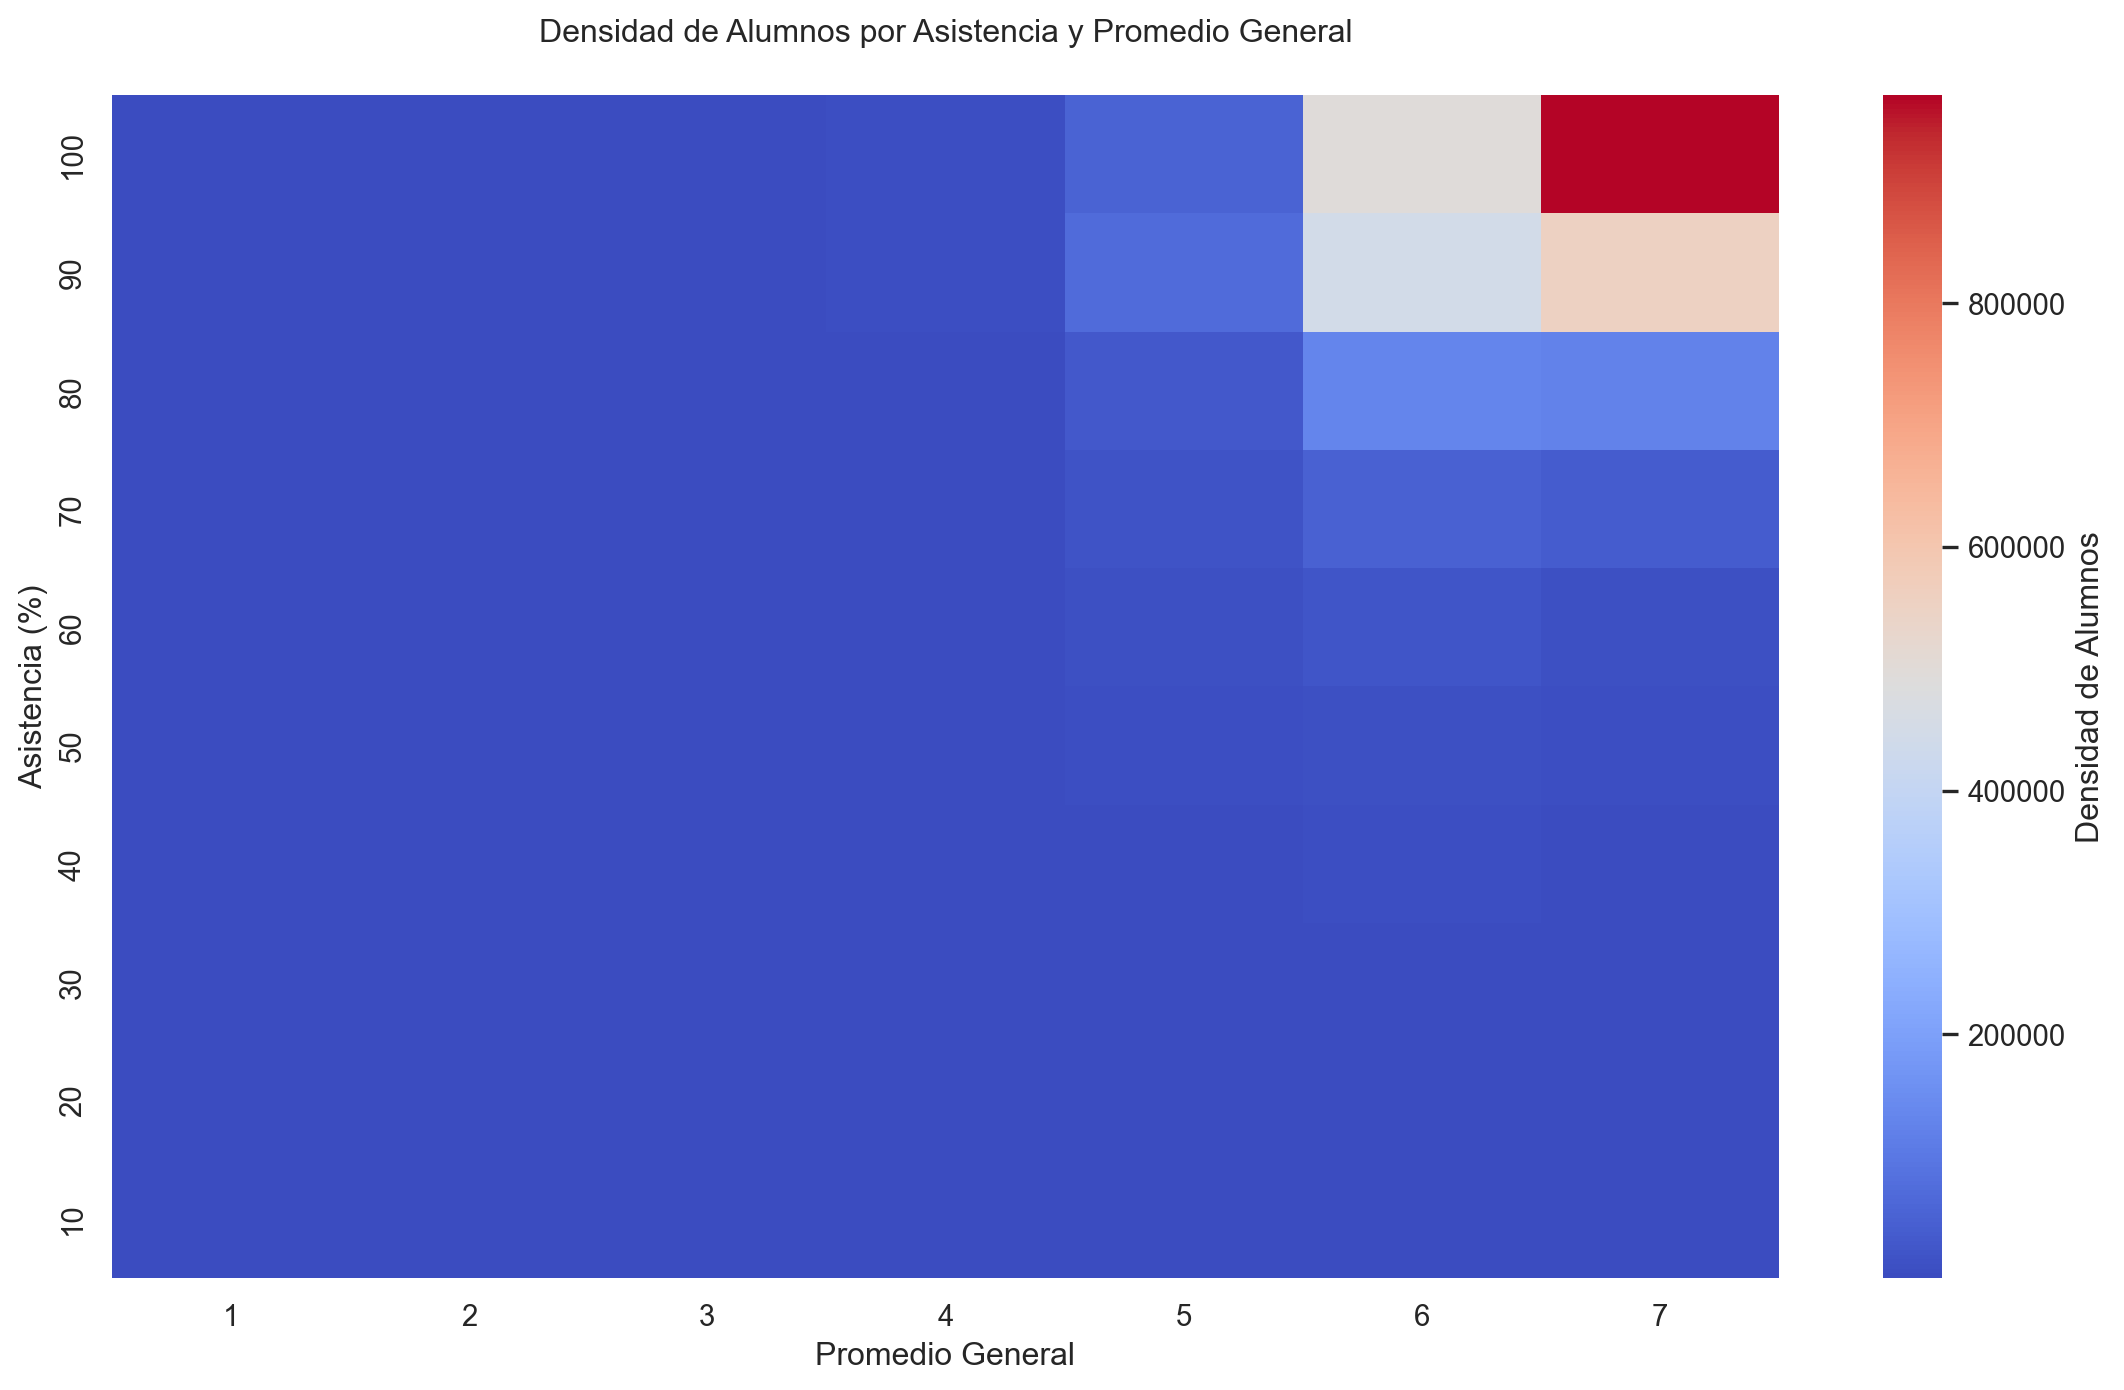

In [81]:
# Asegurar que los datos estén en los rangos correctos y sean categorizados si es necesario
bins_nota = [0, 1, 2, 3, 4, 5, 6, 7]
labels_nota = [1, 2, 3, 4, 5, 6, 7]

bins_asistencia = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels_asistencia = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

#bins_bar = [100000, 200000, 300000, 400000]

df['ASISTENCIA_BIN'] = pd.cut(df['ASISTENCIA'], bins=bins_asistencia, labels=labels_asistencia, include_lowest=True)
df['PROM_GRAL_BIN'] = pd.cut(df['PROM_GRAL'], bins=bins_nota, labels=labels_nota, include_lowest=True)

# Crear una tabla pivotada para contar la cantidad de estudiantes por categoría
pivot_table = df.pivot_table(index='ASISTENCIA_BIN', columns='PROM_GRAL_BIN', aggfunc='size', fill_value=0)

# Generar el heatmap con seaborn
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(pivot_table, cmap='coolwarm', fmt='d', cbar_kws={'label': 'Densidad de Alumnos'})

# Invertir el eje Y
plt.gca().invert_yaxis()

# Títulos y etiquetas
plt.xlabel('Promedio General')
plt.ylabel('Asistencia (%)')
plt.title('Densidad de Alumnos por Asistencia y Promedio General', pad=20)

# Mostrar el gráfico
plt.show()

C:\Users\nicod\AppData\Local\Temp\ipykernel_18428\3990212980.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='ASISTENCIA_BIN', columns='PROM_GRAL_BIN', aggfunc='size', fill_value=0)


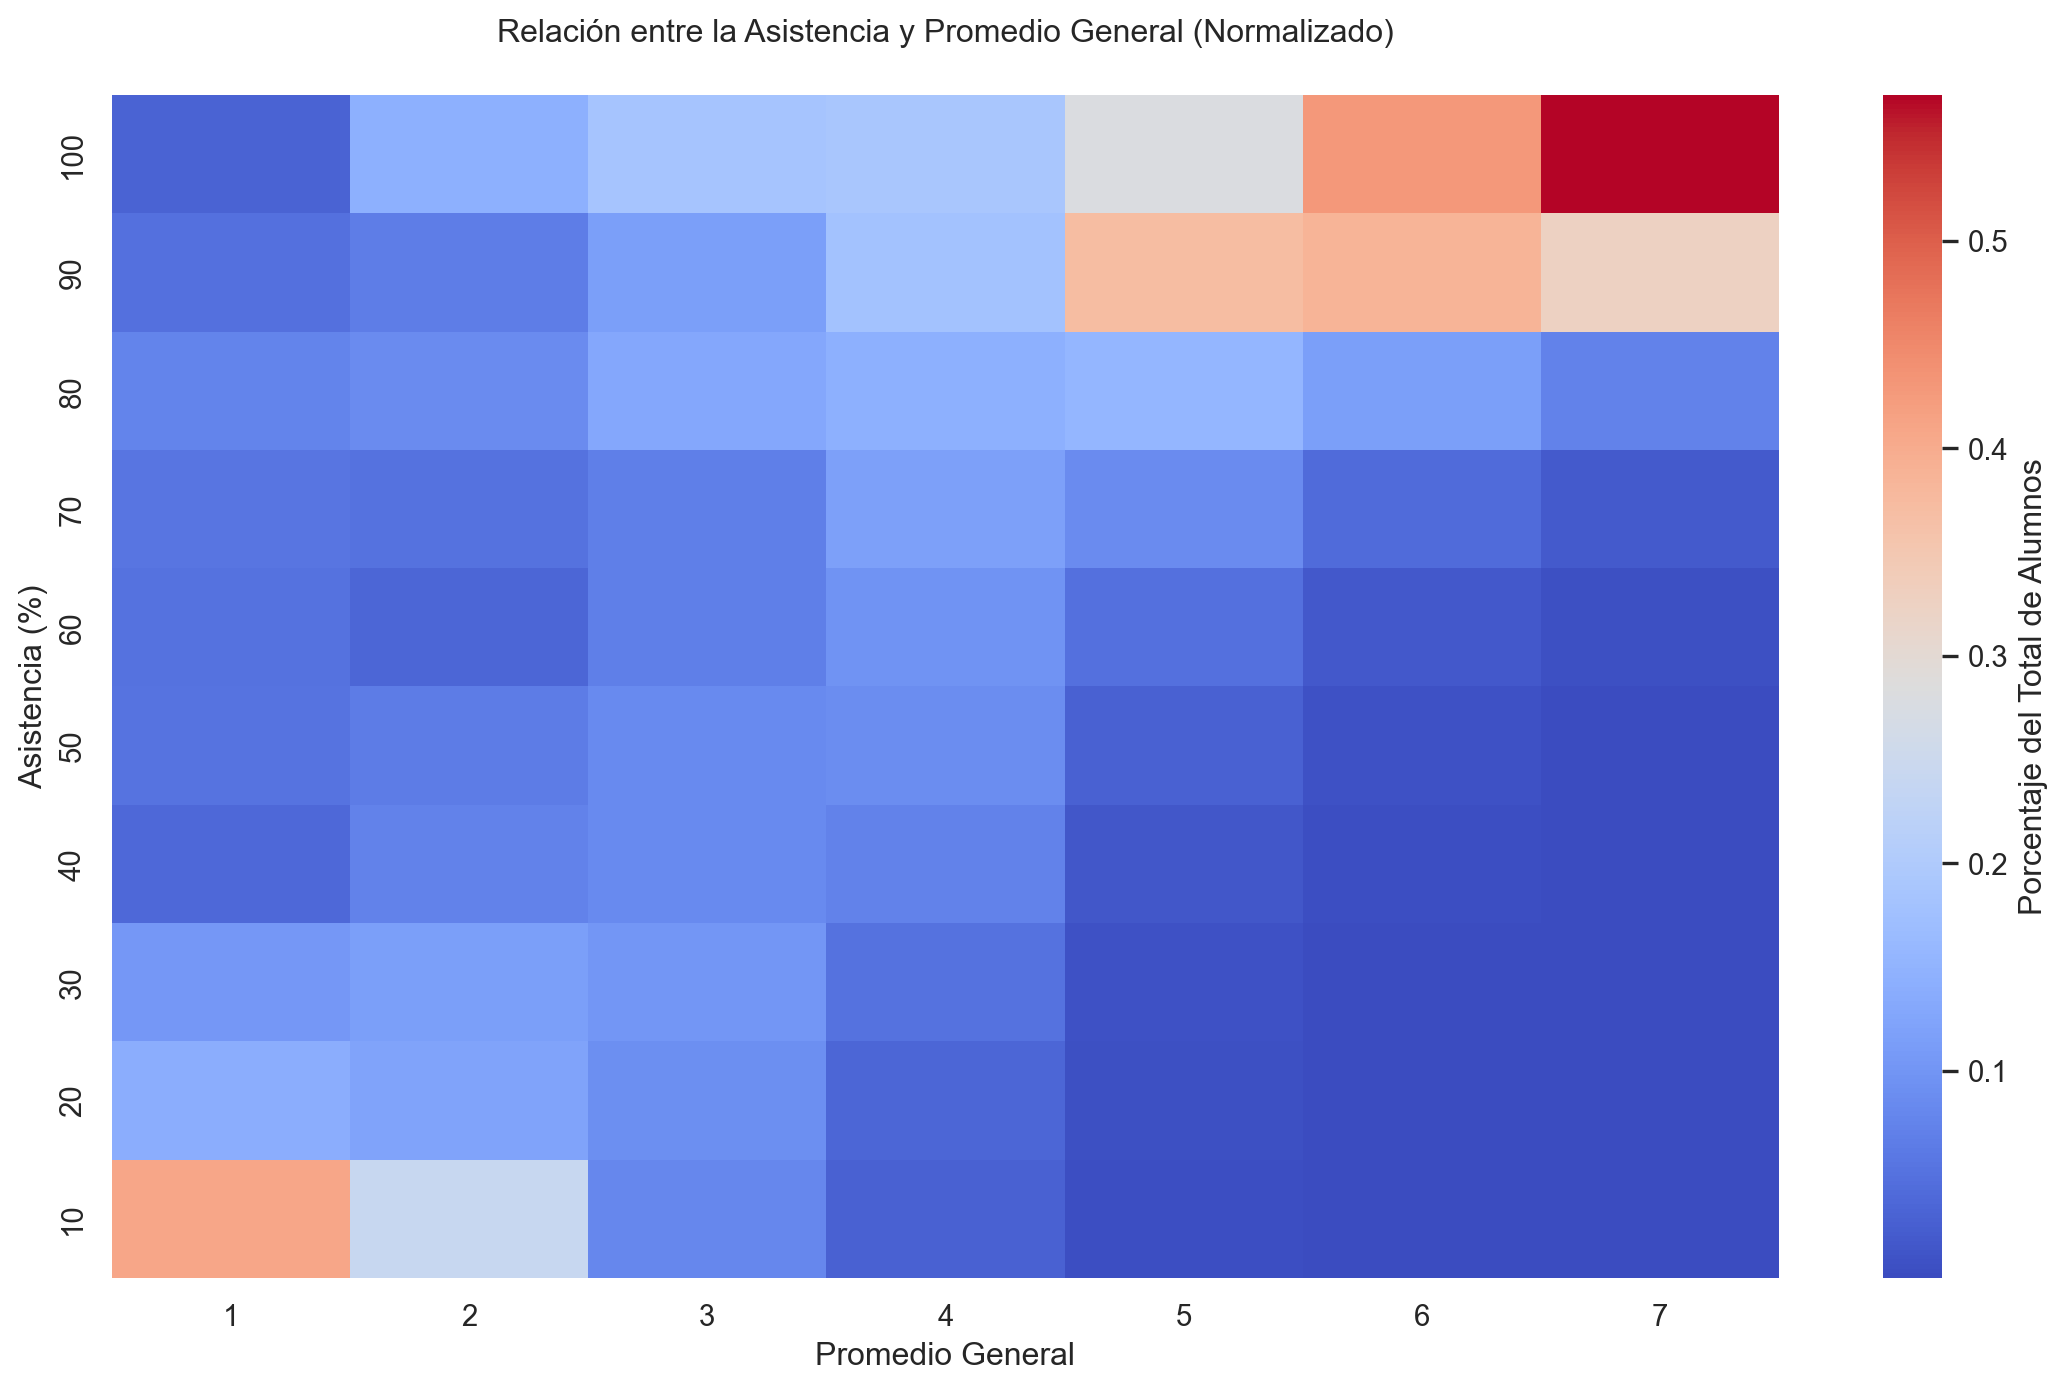

In [95]:
# Asegurar que los datos estén en los rangos correctos y sean categorizados si es necesario
bins_nota = [0, 1, 2, 3, 4, 5, 6, 7]
labels_nota = [1, 2, 3, 4, 5, 6, 7]

bins_asistencia = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels_asistencia = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Categorizar los datos
df['ASISTENCIA_BIN'] = pd.cut(df['ASISTENCIA'], bins=bins_asistencia, labels=labels_asistencia, include_lowest=True)
df['PROM_GRAL_BIN'] = pd.cut(df['PROM_GRAL'], bins=bins_nota, labels=labels_nota, include_lowest=True)

# Crear una tabla pivotada para contar la cantidad de estudiantes por categoría
pivot_table = df.pivot_table(index='ASISTENCIA_BIN', columns='PROM_GRAL_BIN', aggfunc='size', fill_value=0)

# Normalizar los datos en la tabla pivotada
pivot_table_normalized = pivot_table.div(pivot_table.sum())

# Generar el heatmap con seaborn usando los datos normalizados
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(pivot_table_normalized, cmap='coolwarm', fmt=".2%", cbar_kws={'label': 'Porcentaje del Total de Alumnos'})

# Invertir el eje Y
plt.gca().invert_yaxis()

# Títulos y etiquetas
plt.xlabel('Promedio General')
plt.ylabel('Asistencia (%)')
plt.title('Relación entre la Asistencia y Promedio General (Normalizado)', pad=20)

# Mostrar el gráfico
plt.show();

C:\Users\nicod\AppData\Local\Temp\ipykernel_18428\3046325814.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='PROM_GRAL', index='ASISTENCIA_BIN', aggfunc='mean')


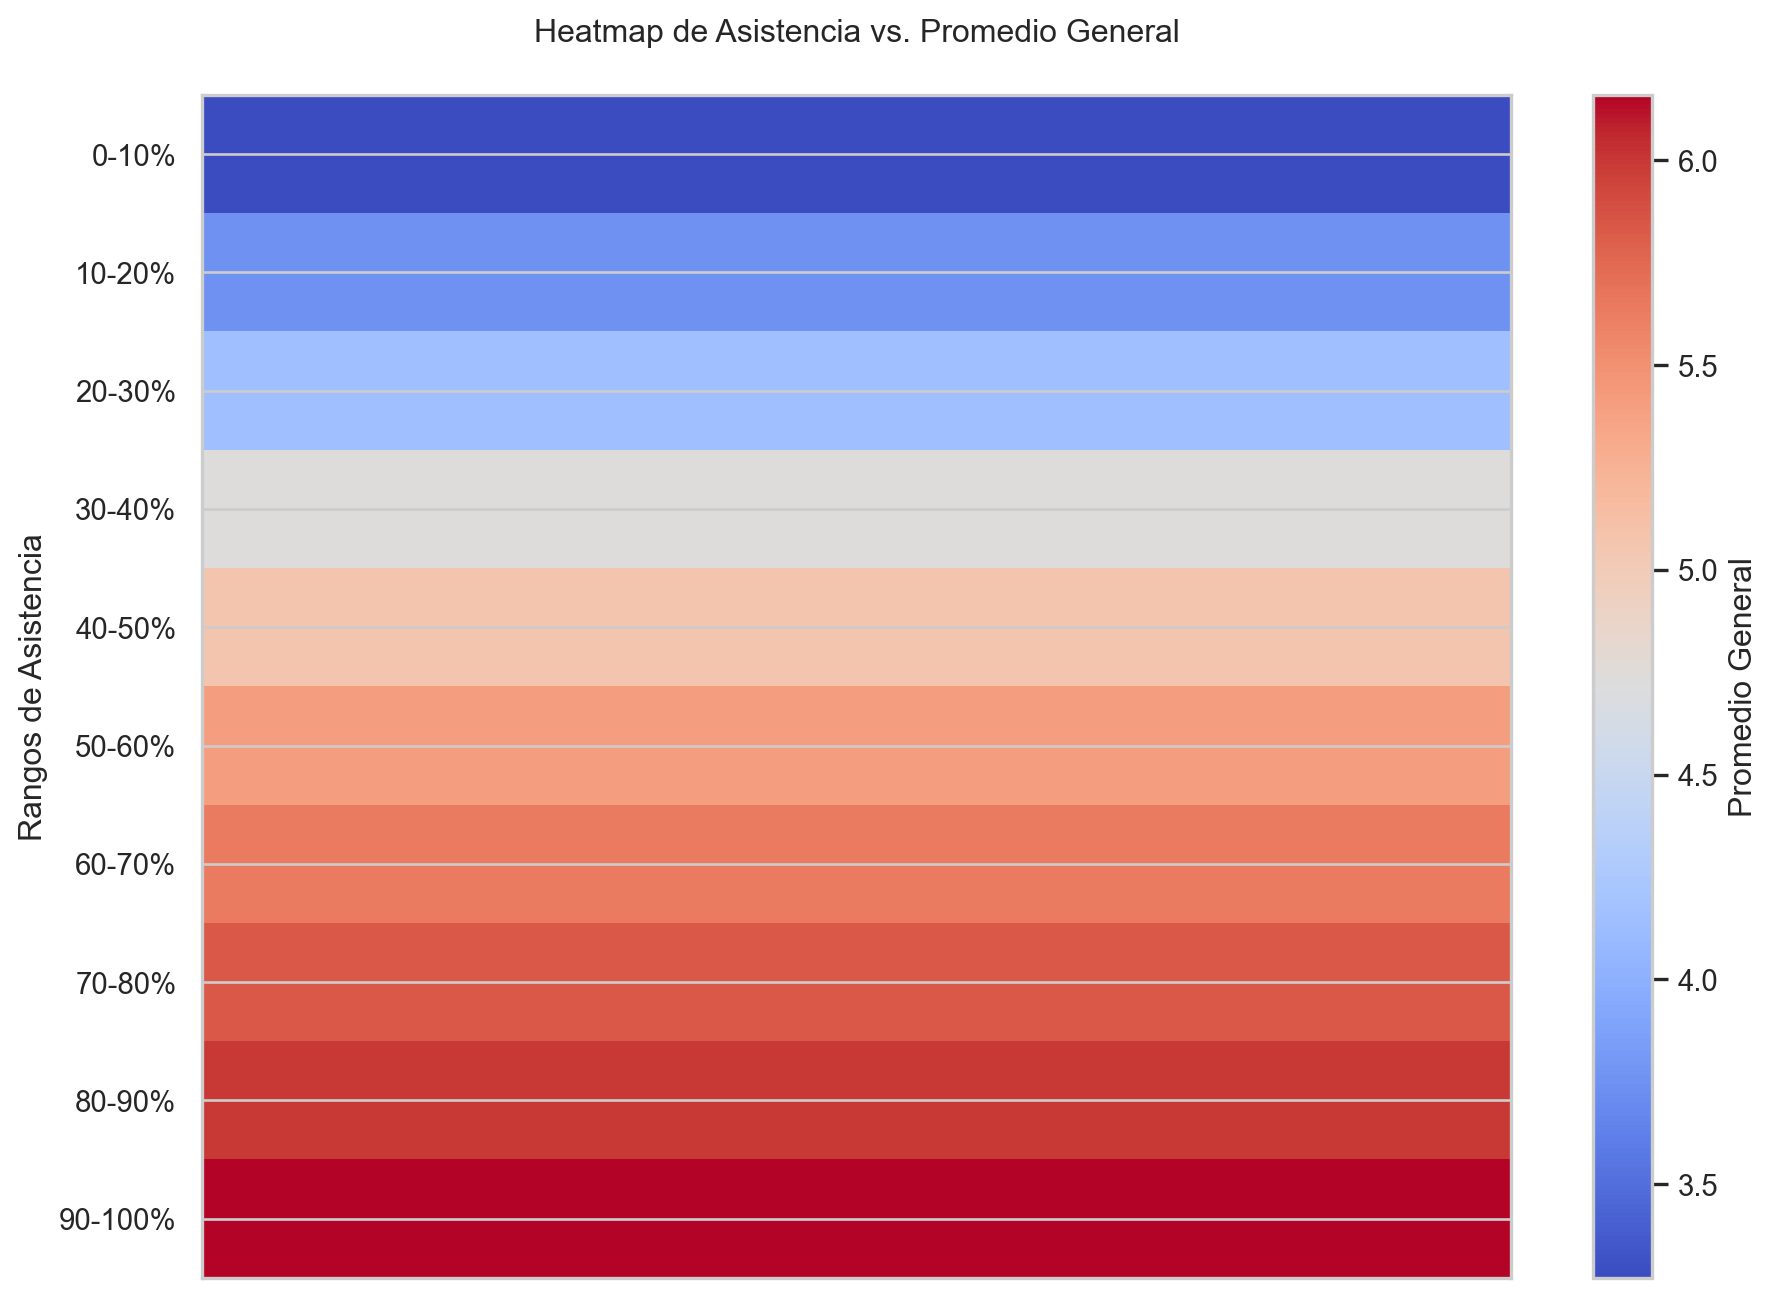

In [14]:
# Categorizar 'ASISTENCIA' en intervalos de 10%
df['ASISTENCIA_BIN'] = pd.cut(df['ASISTENCIA'], bins=range(0, 101, 10), labels=[f"{i}-{i+10}%" for i in range(0, 100, 10)])

# Crear una tabla pivotada
pivot_table = df.pivot_table(values='PROM_GRAL', index='ASISTENCIA_BIN', aggfunc='mean')

# Crear el heatmap
plt.figure(figsize=(11, 8))
heatmap = plt.imshow(pivot_table.values, aspect='auto', cmap='coolwarm')

# Añadir barra de color
plt.colorbar(heatmap, label='Promedio General')

# Añadir etiquetas a los ejes
plt.xticks([])  # No hay etiquetas en el eje X
plt.yticks(range(len(pivot_table.index)), pivot_table.index)

# Títulos y etiquetas
plt.ylabel('Rangos de Asistencia')
plt.title('Heatmap de Asistencia vs. Promedio General', pad=20)

# Mostrar el gráfico
plt.show()

In [15]:
# Carga el shapefile de las regiones de Chile
mapa = gpd.read_file('Regiones.zip')

In [16]:
print("Nombres en el DataFrame de datos:", df['NOM_REG_RBD_A'].unique())
print("Nombres en el DataFrame del mapa:", mapa['Region'].unique())
print(mapa.columns)

Nombres en el DataFrame de datos: ['AYP' 'TPCA' 'ANTOF' 'ATCMA' 'COQ' 'VALPO' 'LGBO' 'MAULE' 'NUBLE' 'BBIO'
 'ARAUC' 'RIOS' 'LAGOS' 'AYSEN' 'MAG' 'RM']
Nombres en el DataFrame del mapa: ['Región de Arica y Parinacota' 'Región de Tarapacá'
 'Región de Antofagasta' 'Región de Magallanes y Antártica Chilena'
 'Región de Aysén del Gral.Ibañez del Campo' 'Región de Atacama'
 'Región de Coquimbo' 'Región de Valparaíso'
 'Región Metropolitana de Santiago' 'Región de Los Lagos'
 'Región de Los Ríos' 'Región de La Araucanía' 'Región del Bío-Bío'
 'Región de Ñuble' 'Región del Maule'
 "Región del Libertador Bernardo O'Higgins" 'Zona sin demarcar']
Index(['objectid', 'cir_sena', 'codregion', 'area_km', 'st_area_sh',
       'st_length_', 'Region', 'geometry'],
      dtype='object')


In [17]:
# Diccionario para el cambio de nombres
dict = {'AYP':'Región de Arica y Parinacota','TPCA':'Región de Tarapacá','ANTOF':'Región de Antofagasta','ATCMA':'Región de Atacama',
        'COQ':'Región de Coquimbo','VALPO':'Región de Valparaíso','LGBO':"Región del Libertador Bernardo O'Higgins",'MAULE':'Región del Maule',
        'NUBLE':'Región de Ñuble','BBIO':'Región del Bío-Bío','ARAUC':'Región de La Araucanía','RIOS':'Región de Los Ríos',
        'LAGOS':'Región de Los Lagos','AYSEN':'Región de Aysén del Gral.Ibañez del Campo','MAG':'Región de Magallanes y Antártica Chilena',
        'RM':'Región Metropolitana de Santiago'}

# Aplica el mapeo para ajustar los nombres
df['NOM_REG_RBD_A'] = df['NOM_REG_RBD_A'].map(dict)

# Verificar que el mapeo se haya aplicado correctamente
print(df['NOM_REG_RBD_A'].unique())

['Región de Arica y Parinacota' 'Región de Tarapacá'
 'Región de Antofagasta' 'Región de Atacama' 'Región de Coquimbo'
 'Región de Valparaíso' "Región del Libertador Bernardo O'Higgins"
 'Región del Maule' 'Región de Ñuble' 'Región del Bío-Bío'
 'Región de La Araucanía' 'Región de Los Ríos' 'Región de Los Lagos'
 'Región de Aysén del Gral.Ibañez del Campo'
 'Región de Magallanes y Antártica Chilena'
 'Región Metropolitana de Santiago']


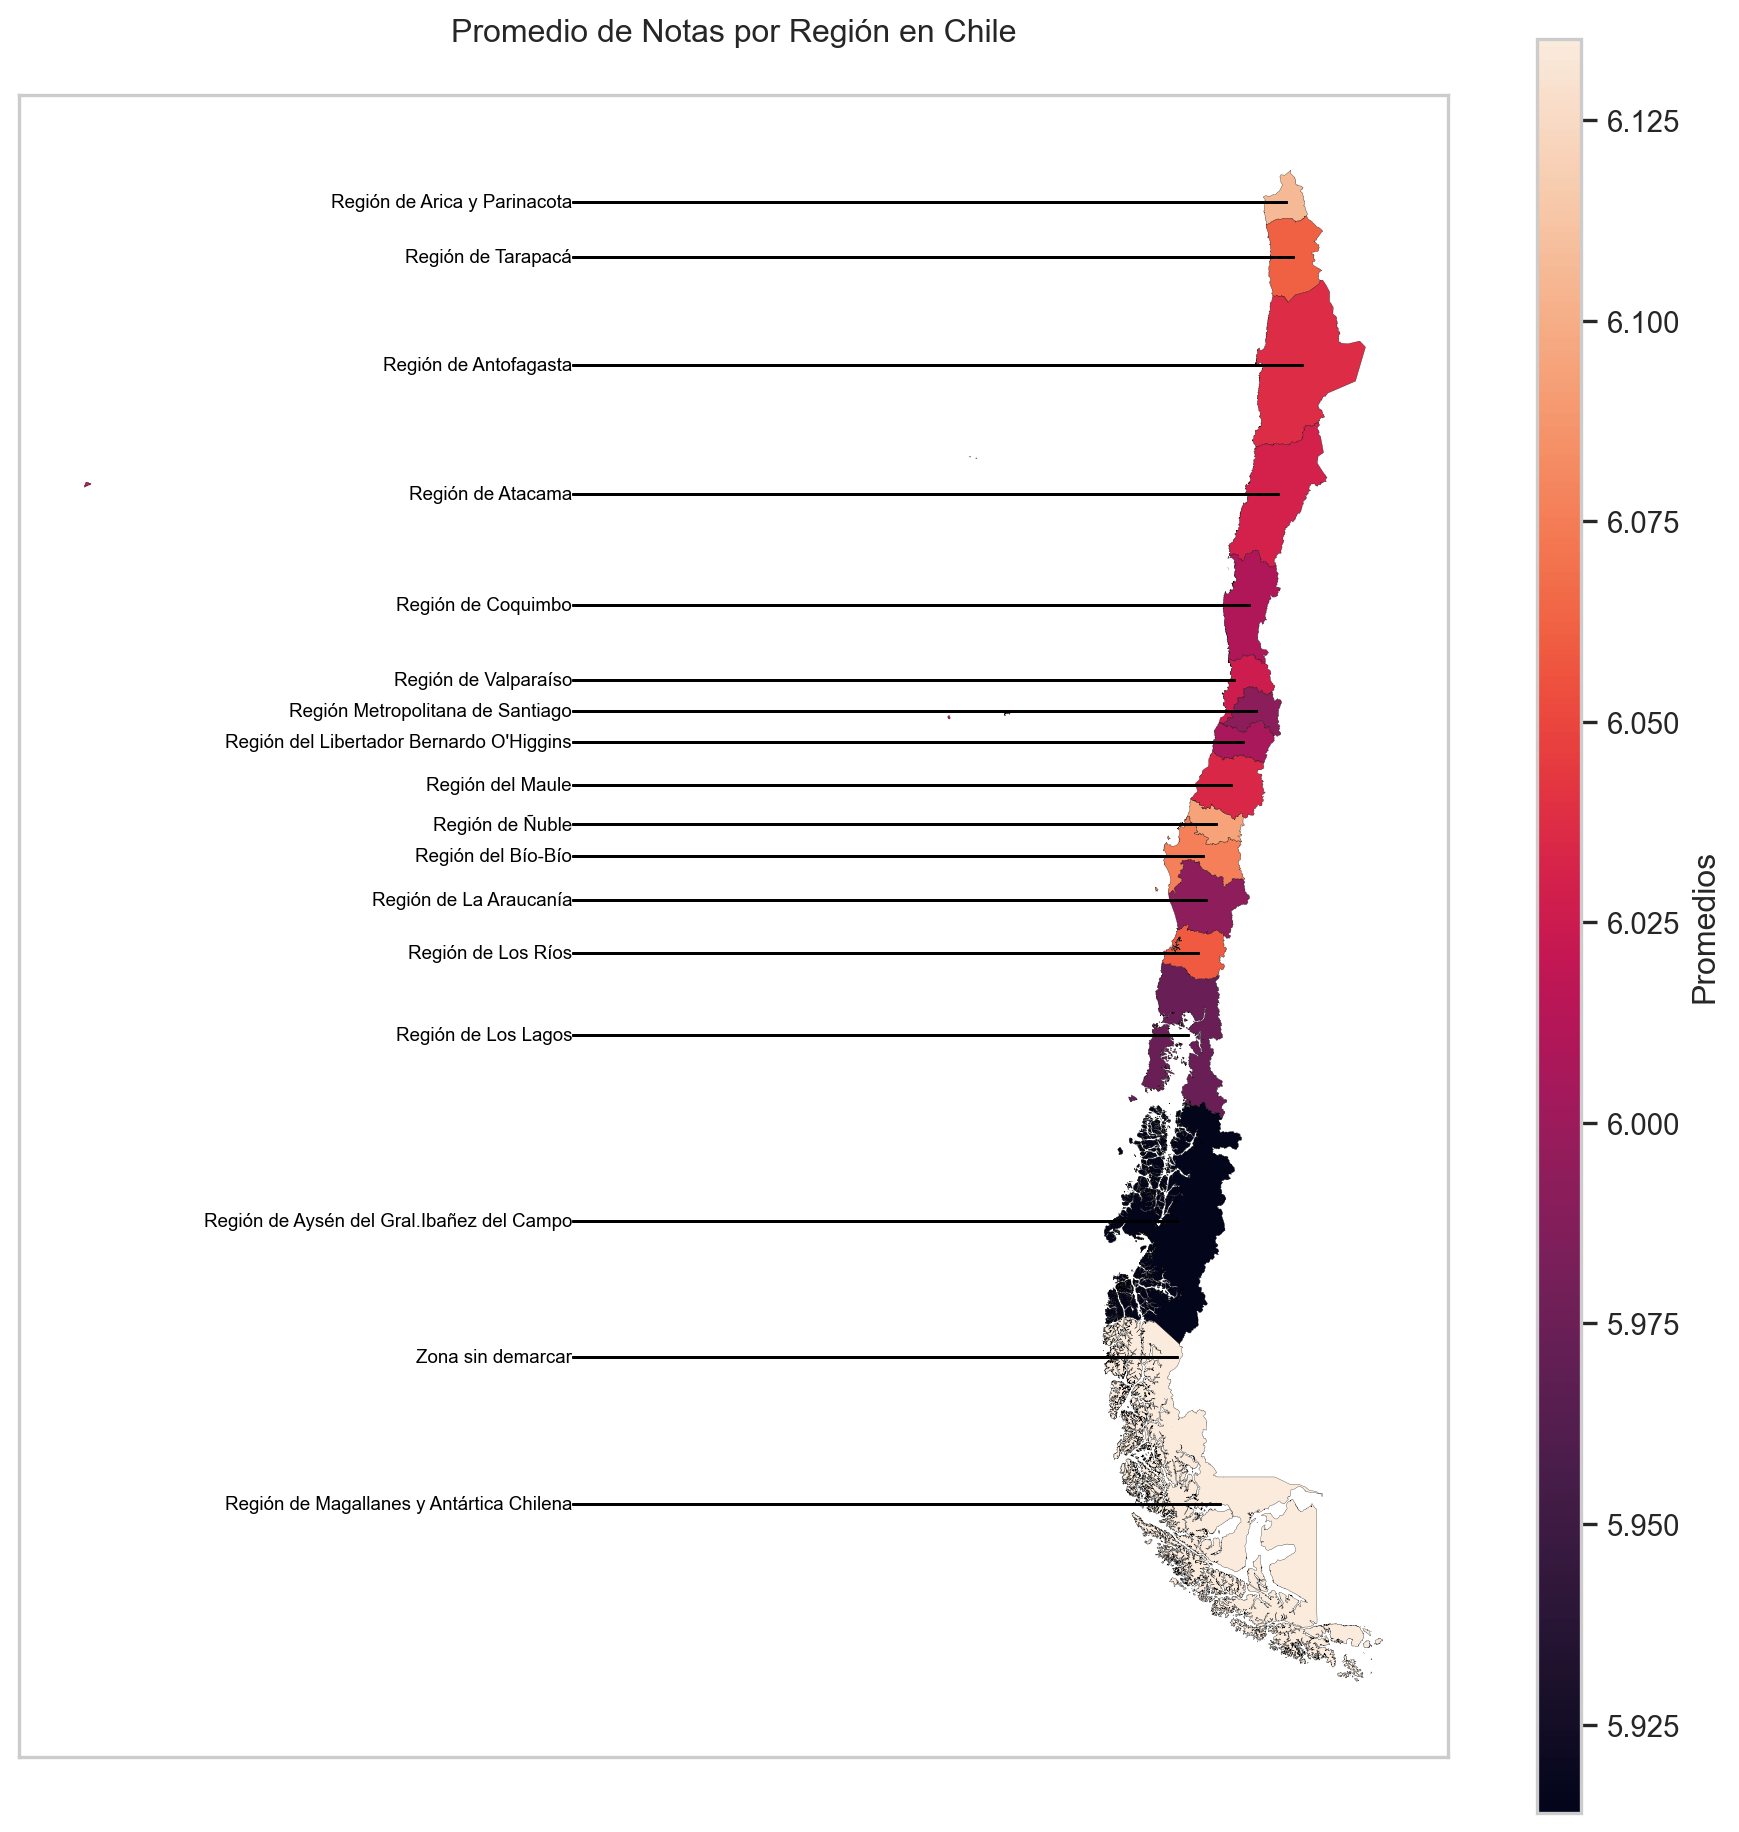

In [18]:
# Convierte la columna 'PROM_GENERAL' a numérica, marcando errores como NaN
df['PROM_GRAL'] = pd.to_numeric(df['PROM_GRAL'], errors='coerce')

# Limpieza: puedes eliminar filas con NaN si es necesario
df.dropna(subset=['PROM_GRAL'], inplace=True)

# Calcula el promedio de notas por región
promedios_regionales = df.groupby('NOM_REG_RBD_A')['PROM_GRAL'].mean().reset_index()

# Fusiona los promedios con el mapa
promedios_mapa = mapa.set_index('Region').join(promedios_regionales.set_index('NOM_REG_RBD_A'))

# Configuración de la figura
fig, ax = plt.subplots(1, 1, figsize=(12, 20))

# Dibujar el mapa con promedios de notas
promedios_mapa.plot(column='PROM_GRAL', ax=ax, legend=True, edgecolor='black', linewidths=0.1,
                    legend_kwds={'label': "Promedios",'orientation': "vertical", 'shrink': 0.6, 'aspect':40})

# Ocultar los números de los ejes
ax.set_xticks([])
ax.set_yticks([])

# Configurar una posición uniforme para los nombres de las regiones
text_x_position = promedios_mapa.total_bounds[0] + 1800000  # Poner texto más a la izquierda

# Añadir nombres de las regiones y dibujar flechas manualmente
for idx, row in mapa.iterrows():
    vertical_position = row['geometry'].centroid.y
    text_position = (text_x_position, vertical_position)
    centroid_position = (row['geometry'].centroid.x, vertical_position)

    # Dibujar flecha
    ax.arrow(text_x_position +150, vertical_position, 
             centroid_position[0] - text_x_position -5000, 0,  # ajustar longitud de la flecha y evitar solapamiento
             head_width=0.02, head_length=10000, fc='black', ec='black')

    # Añadir texto
    ax.text(text_x_position, vertical_position, row['Region'],
            horizontalalignment='right', fontsize=7, color='black',
            verticalalignment='center')

plt.title('Promedio de Notas por Región en Chile', pad=20)
plt.show()

Index(['REGION', 'PROVINCIA', 'COMUNA', 'COD_DISTRI', 'DESC_REGIO',
       'DESC_PROVI', 'DESC_COMUN', 'DESC_DISTR', 'FID', 'geometry'],
      dtype='object')

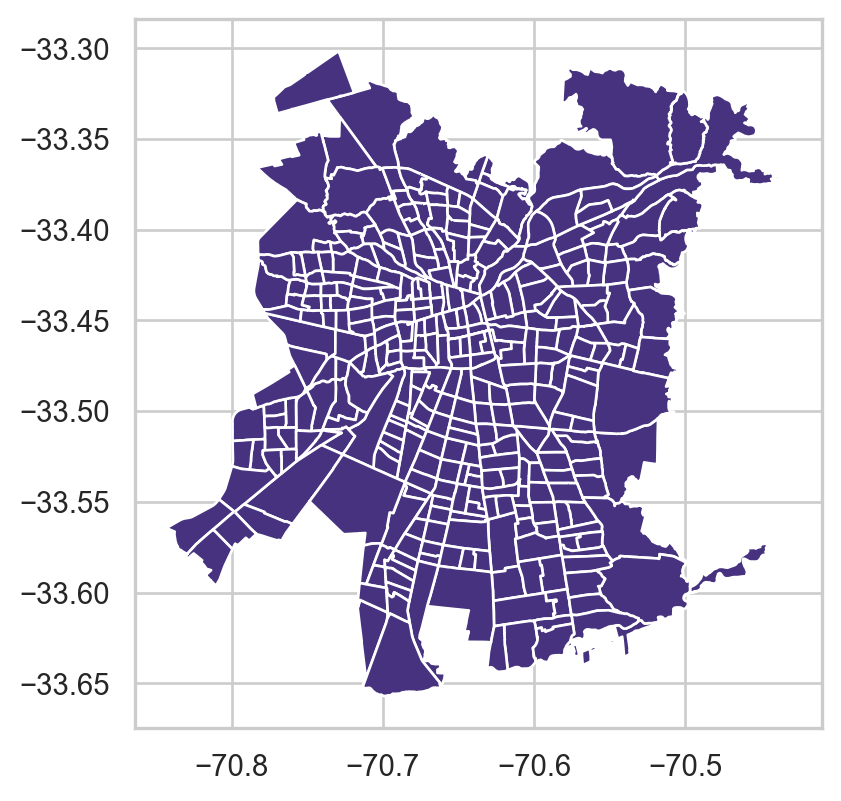

In [45]:
mapa = gpd.read_file('urban_districts.zip')


mapa.plot()

mapa.columns

In [47]:
# print(df.columns)
print("Nombres en el DataFrame de datos:", df['NOM_COM_ALU'].unique())

print(mapa.columns)
print("Nombres en el DataFrame del mapa:", mapa['DESC_COMUN'].unique())

Nombres en el DataFrame de datos: ['ARICA' 'COQUIMBO' 'ALTO HOSPICIO' 'VALPARAÍSO' 'CAMARONES' 'COLINA'
 'OLMUÉ' 'LA SERENA' 'COPIAPÓ' 'OVALLE' 'RINCONADA' 'RANCAGUA' 'PUTRE'
 'TOCOPILLA' 'CALAMA' 'MEJILLONES' 'ANTOFAGASTA' 'CHAÑARAL' 'CAMIÑA'
 'MONTE PATRIA' 'PICA' 'QUILLOTA' 'LOS ÁNGELES' 'PUENTE ALTO' 'SANTIAGO'
 'PUDAHUEL' 'GENERAL LAGOS' 'RENCA' 'POZO ALMONTE' 'IQUIQUE' 'PEÑALOLÉN'
 'LO PRADO' 'CALERA' 'CERRO NAVIA' 'ALGARROBO' 'MAIPÚ' 'RENGO' 'MACUL'
 'PUNITAQUI' 'LINARES' 'CONCHALÍ' 'COYHAIQUE' 'CONCÓN' 'PUNTA ARENAS'
 'VILLA ALEMANA' 'SAN JOAQUÍN' 'PUERTO VARAS' 'ÑUÑOA' 'LA REINA'
 'CHIGUAYANTE' 'CONCEPCIÓN' 'INDEPENDENCIA' 'CERRILLOS' 'CHILLÁN' 'HUARA'
 'OSORNO' 'SAN MIGUEL' 'TALTAL' 'CHOLCHOL' 'LA CISTERNA' 'VALLENAR'
 'QUINTA NORMAL' 'SAN BERNARDO' 'LOS VILOS' 'ANCUD' 'QUILPUÉ' 'LA FLORIDA'
 'ILLAPEL' 'ESTACIÓN CENTRAL' 'LLAILLAY' 'CISNES' 'VIÑA DEL MAR'
 'LAS CONDES' 'COLBÚN' 'SAN ESTEBAN' 'LA GRANJA' 'LOS ANDES' 'LO ESPEJO'
 'PORVENIR' 'LAMPA' 'PETORCA' 'QUELLÓN' 'RECOLETA

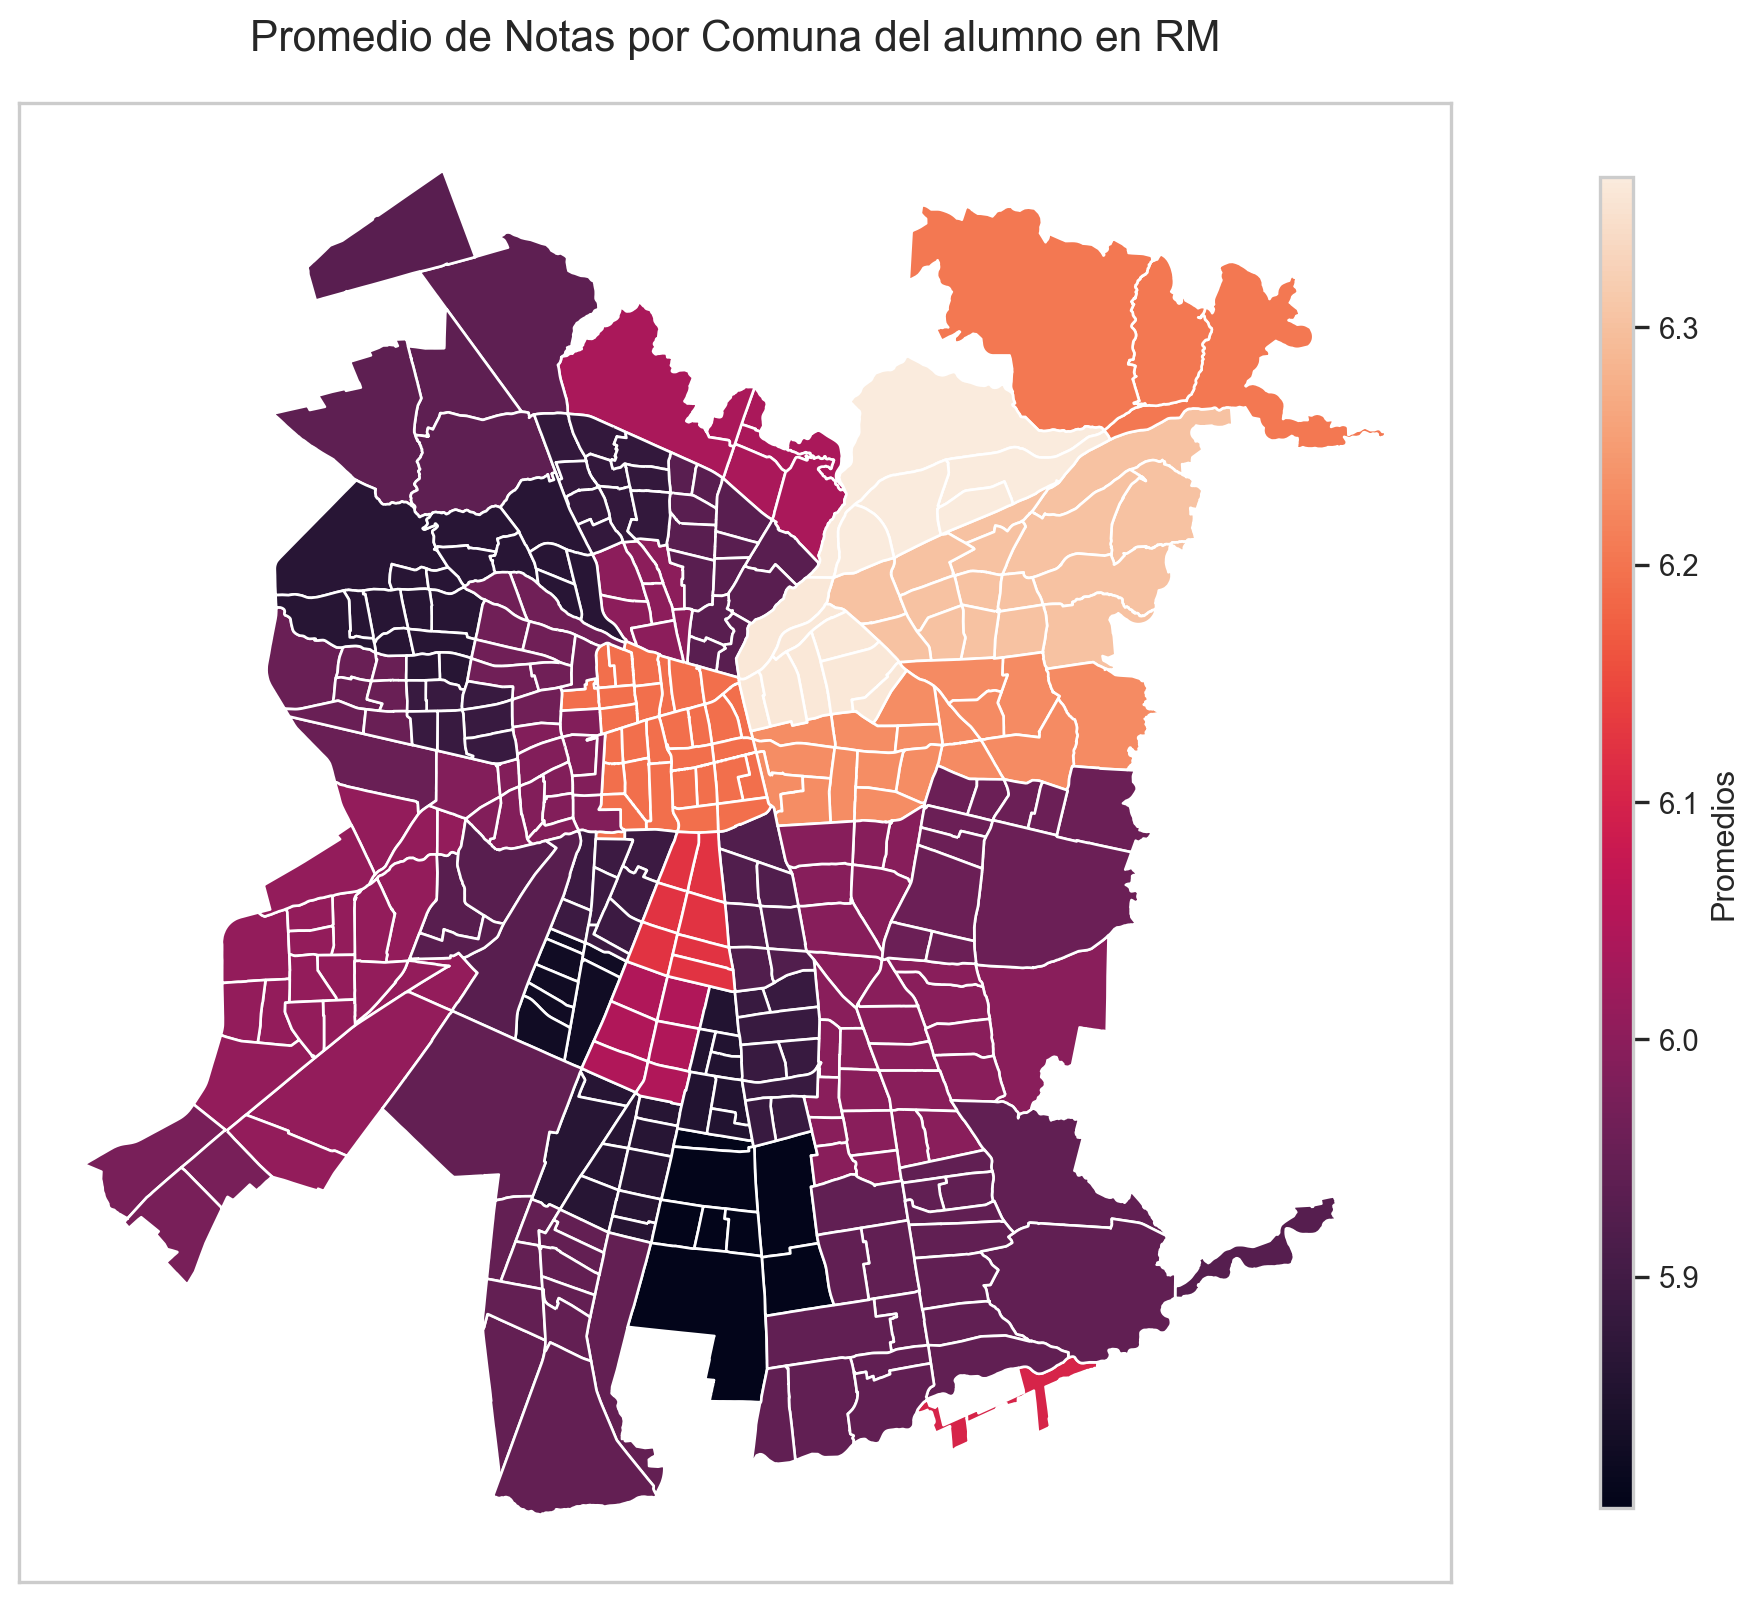

In [48]:
# Convierte la columna 'PROM_GENERAL' a numérica, marcando errores como NaN
df['PROM_GRAL'] = pd.to_numeric(df['PROM_GRAL'], errors='coerce')

# Limpieza: puedes eliminar filas con NaN si es necesario
df.dropna(subset=['PROM_GRAL'], inplace=True)

# Calcula el promedio de notas por región
promedios_comunales = df.groupby('NOM_COM_ALU')['PROM_GRAL'].mean().reset_index()

# Fusiona los promedios con el mapa
promedios_mapa = mapa.set_index('DESC_COMUN').join(promedios_comunales.set_index('NOM_COM_ALU'))

# Configuración del gráfico
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Dibujar el mapa con promedios de notas
promedios_mapa.plot(column='PROM_GRAL', ax=ax, legend=True,
                    legend_kwds={'label': "Promedios", 'orientation': "vertical", 'shrink': 0.9, 'aspect':40})

# Ocultar los números de los ejes
ax.set_xticks([])
ax.set_yticks([])

plt.title('Promedio de Notas por Comuna del alumno en RM', pad=20, fontsize=16)
plt.show()

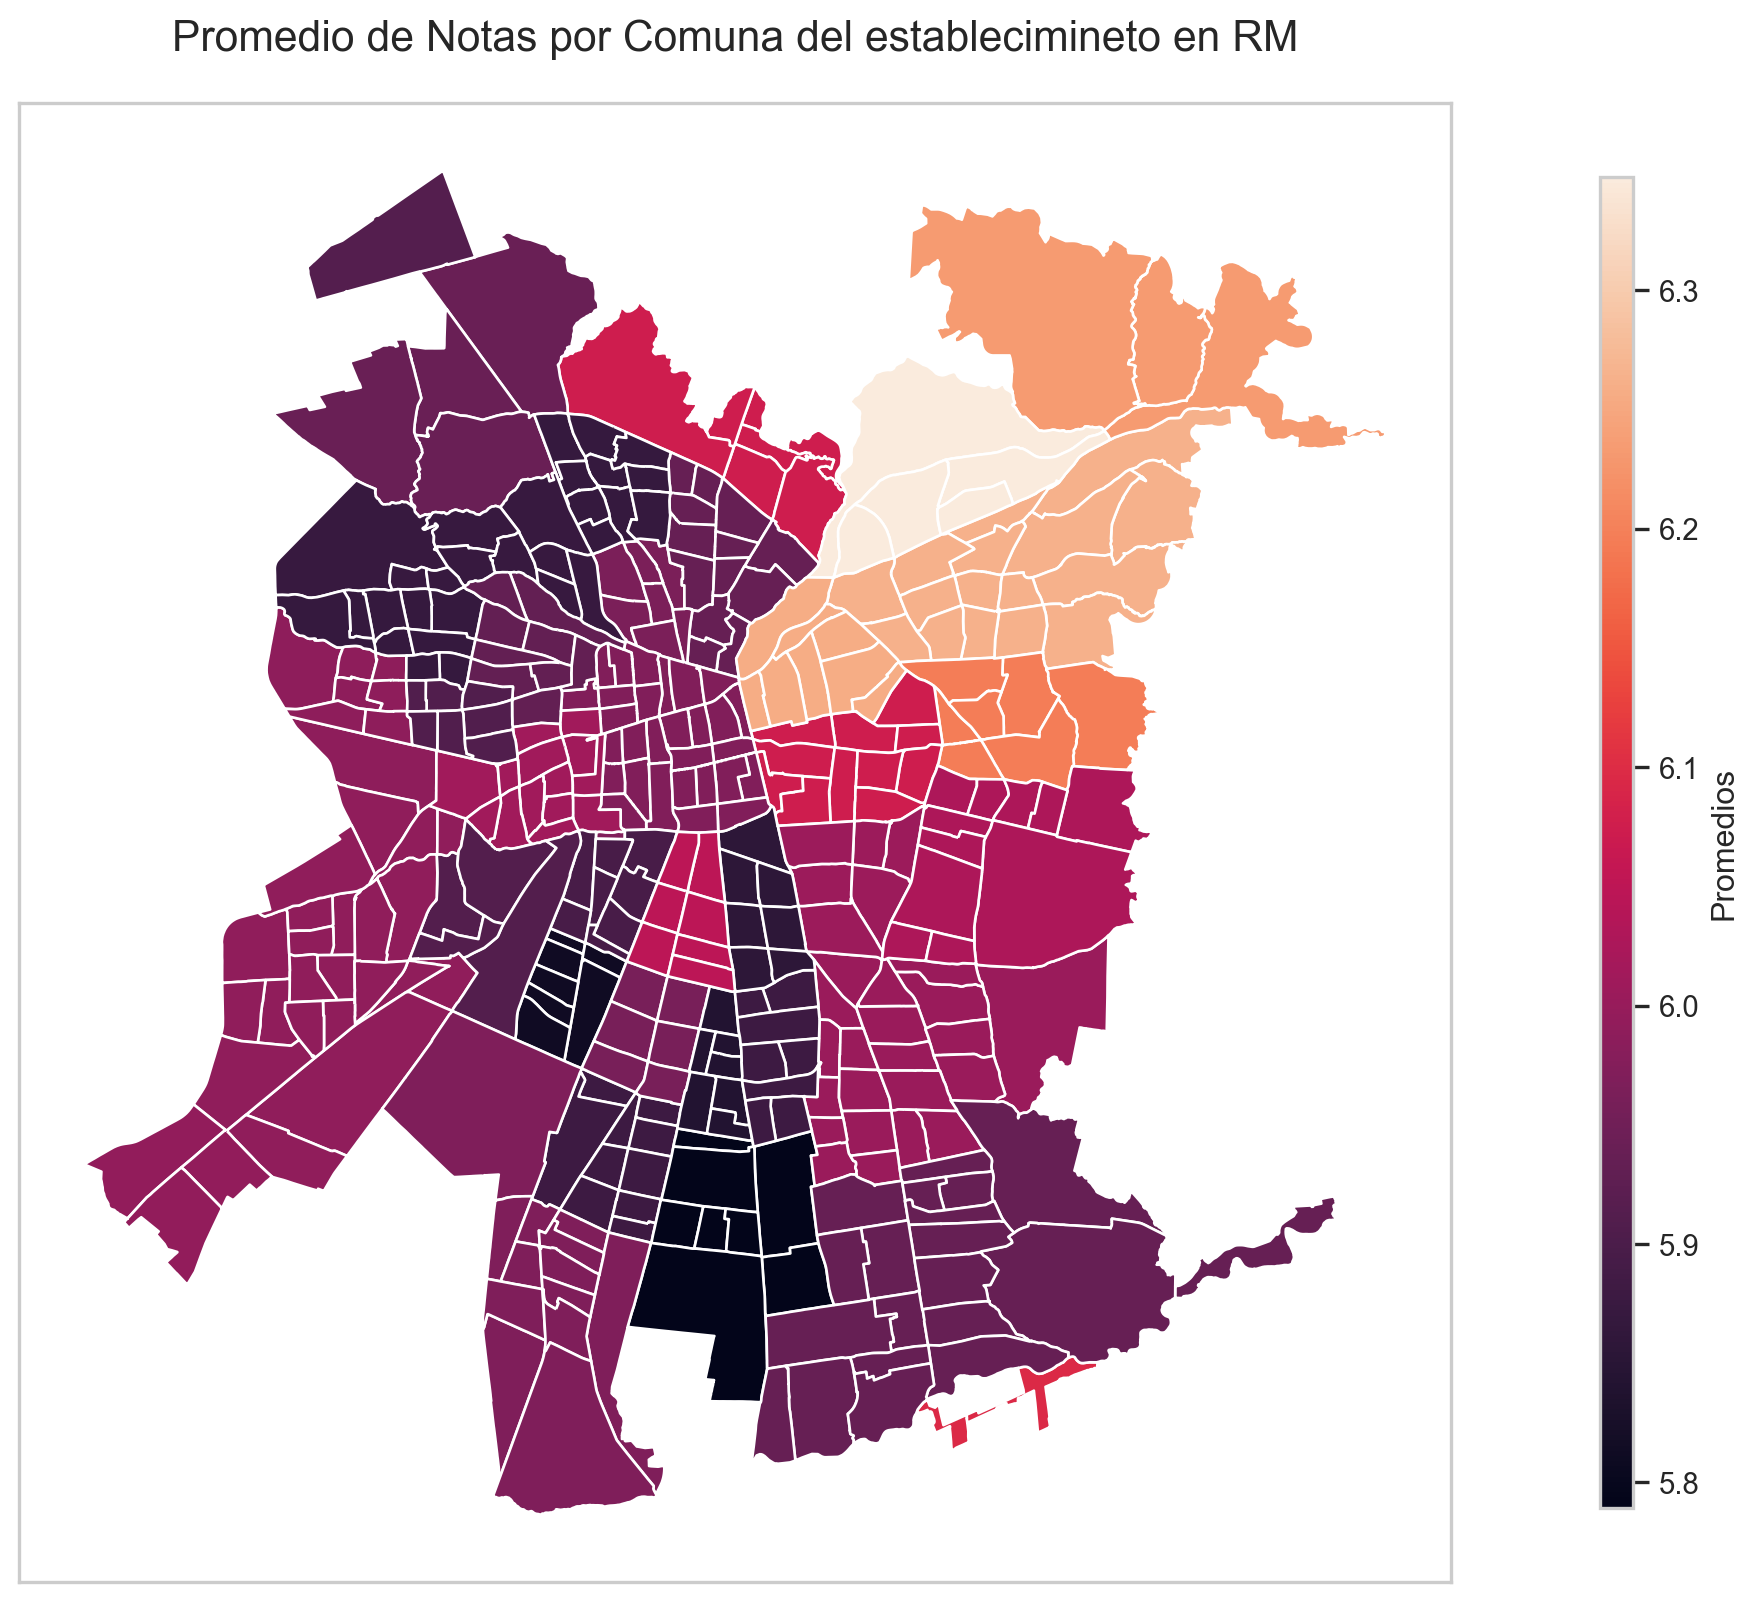

In [49]:
# Convierte la columna 'PROM_GENERAL' a numérica, marcando errores como NaN
df['PROM_GRAL'] = pd.to_numeric(df['PROM_GRAL'], errors='coerce')

# Limpieza: puedes eliminar filas con NaN si es necesario
df.dropna(subset=['PROM_GRAL'], inplace=True)

# Calcula el promedio de notas por región
promedios_comunales = df.groupby('NOM_COM_RBD')['PROM_GRAL'].mean().reset_index()

# Fusiona los promedios con el mapa
promedios_mapa = mapa.set_index('DESC_COMUN').join(promedios_comunales.set_index('NOM_COM_RBD'))

# Configuración del gráfico
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Dibujar el mapa con promedios de notas
promedios_mapa.plot(column='PROM_GRAL', ax=ax, legend=True,
                    legend_kwds={'label': "Promedios", 'orientation': "vertical", 'shrink': 0.9, 'aspect':40})

# Ocultar los números de los ejes
ax.set_xticks([])
ax.set_yticks([])

plt.title('Promedio de Notas por Comuna del establecimineto en RM', pad=20, fontsize=16)
plt.show()